source - https://www.kaggle.com/yellowj4acket/real-estate-california

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('RealEstate_California.csv')

In [3]:
df.head()

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


Clearing features with one unique value

In [4]:
df = df.drop('Unnamed: 0', axis = 1)

In [5]:
df.stateId.unique()

array([9], dtype=int64)

In [6]:
df = df.drop('stateId', axis = 1)

In [7]:
df.country.unique()

array(['USA'], dtype=object)

In [8]:
df = df.drop('country', axis = 1)

In [9]:
pd.to_datetime(df.datePostedString)

0       2021-01-13
1       2021-07-12
2       2021-07-08
3       2021-07-07
4       2021-07-07
           ...    
35384   2021-06-19
35385   2021-06-17
35386   2021-06-21
35387   2021-06-11
35388   2021-06-08
Name: datePostedString, Length: 35389, dtype: datetime64[ns]

In [10]:
df['datePostedString'] = pd.to_datetime(df.datePostedString)

In [11]:
df.currency.unique()

array(['USD'], dtype=object)

In [12]:
df = df.drop('currency', axis = 1)

In [13]:
df.state.unique()

array(['CA'], dtype=object)

In [14]:
df = df.drop('state', axis = 1)

In [15]:
df.head()

,id,countyId,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,95717-2087851113,77,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,94564-18496265,189,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,190,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,191,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,94564-2069722747,192,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


In [16]:
df.groupby('is_bankOwned').price.mean()

is_bankOwned
0    1.187979e+06
1    1.225667e+05
Name: price, dtype: float64

In [17]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

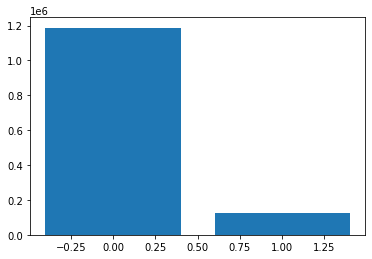

In [18]:
plt.bar(df.is_bankOwned.unique(), df.groupby('is_bankOwned').price.mean())

In [19]:
df.groupby('is_forAuction').price.mean()

is_forAuction
0    1.186942e+06
1    2.475654e+06
Name: price, dtype: float64

<BarContainer object of 2 artists>

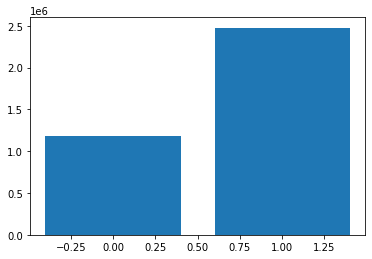

In [20]:
plt.bar(df.is_forAuction.unique(), df.groupby('is_forAuction').price.mean())

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

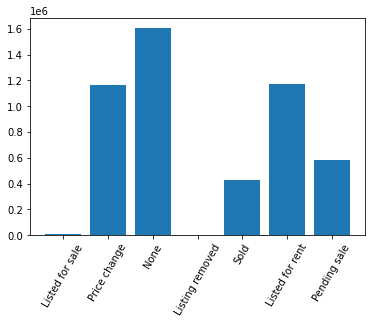

In [21]:
plt.bar(df.event.unique(), df.groupby('event').price.mean())
plt.xticks(rotation=60)

In [22]:
df.groupby('event').price.count()

event
Listed for rent        5
Listed for sale    24622
Listing removed     4311
None                 289
Pending sale           1
Price change        4893
Sold                1268
Name: price, dtype: int64

In [23]:
df.head()

,id,countyId,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,95717-2087851113,77,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,94564-18496265,189,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,190,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,191,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,94564-2069722747,192,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


In [24]:
pd.set_option('display.max_columns', None)

In [25]:
df.head()

,id,countyId,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,95717-2087851113,77,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,94564-18496265,189,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,190,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,191,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,94564-2069722747,192,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


In [26]:
df.groupby('id', as_index = False).price.count().sort_values('price', ascending = False)[:15]

,id,price
8472,92105-295357261,2
4976,91360-16424605,2
4989,91360-16470711,2
4988,91360-16429830,2
4987,91360-16429807,2
4983,91360-16427106,2
4981,91360-16426743,2
4980,91360-16426252,2
4979,91360-16426146,2
4978,91360-16425930,2


In [27]:
df[df.id == '92105-295357261']

,id,countyId,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
1083,92105-295357261,12352,54296,2021-07-08,0,0,Listed for sale,1.621901e+12,1025000.0,0.0,San Diego,1985,4646 Home Ave,92105.0,-117.095161,32.733391,0,Back on Market at no fault! Was in escrow at $...,0.0,0.0,sqft,0.0,0.0,0.0,0,0.0,0,Two,0,0,0,0,MULTI_FAMILY,San Diego County
31223,92105-295357261,75424,54296,2021-07-08,0,0,Listed for sale,1.621901e+12,1025000.0,0.0,San Diego,1985,4646 Home Ave,92105.0,-117.095161,32.733391,0,Back on Market at no fault! Was in escrow at $...,0.0,0.0,sqft,0.0,0.0,0.0,0,0.0,0,Two,0,0,0,0,MULTI_FAMILY,San Diego County


In [28]:
df[df.id == '91360-16422883']

,id,countyId,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
4412,91360-16422883,49329,34278,2021-07-07,0,0,Listed for sale,1.625616e+12,997500.0,381.0,Thousand Oaks,1968,2719 Granvia Pl,91360.0,-118.899734,34.215794,0,"""Simply a beautiful home and property! This W...",2621.0,2621.0,sqft,3.0,5.0,0.0,1,2.0,1,Two,1,1,0,0,SINGLE_FAMILY,Ventura County
34743,91360-16422883,123242,34278,2021-07-07,0,0,Listed for sale,1.625616e+12,997500.0,381.0,Thousand Oaks,1968,2719 Granvia Pl,91360.0,-118.899734,34.215794,0,"""Simply a beautiful home and property! This W...",2621.0,2621.0,sqft,3.0,5.0,0.0,1,2.0,1,Two,1,1,0,0,SINGLE_FAMILY,Ventura County


In [29]:
df[df.id == '92660-2069646141']

,id,countyId,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
19806,92660-2069646141,259359,53571,2021-07-09,0,0,Listed for sale,1.625789e+12,1650000.0,789.0,Newport Beach,2022,2153 Andover Ln,92660.0,-117.905281,33.629925,0,Located in beautiful Newport Beach California ...,2091.0,2091.0,sqft,4.0,3.0,0.0,1,2.0,1,Three Or More,0,1,1,0,CONDO,Orange County
32658,92660-2069646141,95105,53571,2021-07-09,0,0,Listed for sale,1.625789e+12,1650000.0,789.0,Newport Beach,2021,2153 Andover Ln,92660.0,-117.905281,33.629925,0,Located in beautiful Newport Beach California ...,2091.0,2091.0,sqft,4.0,3.0,0.0,1,2.0,1,Three Or More,0,1,1,0,CONDO,Orange County


So, we have same estates, but with different countyId. For last one there is one ore difference in yearBuilt feature. To my mind, the best decision is delete them

In [30]:
df.groupby('id', as_index = False).price.count().sort_values('price')[:15]

,id,price
0,-2080755110,1
20357,94517-18356782,1
20356,94517-18356454,1
20355,94517-18355146,1
20354,94517-18321759,1
20353,94517-18321754,1
20352,94517-18321609,1
20351,94515-82884919,1
20350,94515-82884468,1
20349,94515-82884110,1


In [31]:
(df.groupby('id', as_index = False).price.count().sort_values('price', ascending = False).price >= 2).sum()

4151

So, here 4151 samples this kind of dublicates. Let's check if we delete countyId feature, will situation change?

In [32]:
(df.drop('countyId', axis = 1).drop_duplicates().groupby('id', as_index = False).price.count()\
 .sort_values('price', ascending = False).price >= 2).sum()

141

Yeah, so I don't see reasons why we shouldn't do it.

In [33]:
df = df.drop('countyId', axis = 1).drop_duplicates()

But here also 141 samples

In [34]:
df.groupby('id', as_index = False).price.count().sort_values('price', ascending = False)[:15]

,id,price
2484,90404-20474726,2
6105,91739-17312336,2
9107,92154-241608172,2
21696,94602-24773418,2
25651,95407-15779881,2
4235,91206-20842566,2
23150,95039-19378618,2
2266,90291-20482272,2
19301,94102-2070308565,2
3693,91001-20915173,2


In [35]:
df[df.id == '90404-20474726']

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
16851,90404-20474726,26964,2021-07-13,0,0,Listed for sale,1.626134e+12,1299000.0,794.0,Santa Monica,1989,1333 18th St UNIT 1,90404.0,-118.482361,34.027988,0,This inviting front facing 3+2.5 architectural...,1636.0,1636.0,sqft,3.0,3.0,0.0,1,2.0,1,Two,0,0,0,0,TOWNHOUSE,Los Angeles County
27403,90404-20474726,26964,2021-07-13,0,0,Sold,1.314922e+12,775007.0,474.0,Santa Monica,1989,1333 18th St UNIT 1,90404.0,-118.482361,34.027988,0,This inviting front facing 3+2.5 architectural...,1636.0,1636.0,sqft,3.0,3.0,0.0,1,2.0,1,Two,0,0,0,0,TOWNHOUSE,Los Angeles County


In [36]:
df[df.id == '94102-2070308565']

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
701,94102-2070308565,20330,2021-07-11,0,0,Listed for sale,1.623197e+12,0.0,0.0,San Francisco,2021,Coming Soon Plan,94102.0,-122.419975,37.775085,0,"""Perfectly located at the nexus of Hayes Valle...",0.0,0.0,sqft,0.0,0.0,0.0,0,0.0,0,0,0,0,1,0,SINGLE_FAMILY,San Francisco County
25254,94102-2070308565,20330,2021-07-13,0,0,Listed for sale,1.623197e+12,0.0,0.0,San Francisco,2021,Coming Soon Plan,94102.0,-122.419975,37.775085,0,"""Perfectly located at the nexus of Hayes Valle...",0.0,0.0,sqft,0.0,0.0,0.0,0,0.0,0,0,0,0,1,0,SINGLE_FAMILY,San Francisco County


In [37]:
df[df.id == '91384-55822357']

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
5331,91384-55822357,10734,2021-06-25,0,0,Listed for sale,1.624579e+12,799900.0,289.0,Castaic,2002,28135 Gibraltar Ln,91384.0,-118.628349,34.457012,0,WELCOME HOME!! Nestled atop the hill in Castai...,2772.0,2772.0,sqft,3.0,5.0,0.0,1,2.0,1,Two,0,0,0,0,SINGLE_FAMILY,Los Angeles County
30196,91384-55822357,10734,2021-06-25,0,0,Price change,1.626134e+12,799000.0,288.0,Castaic,2002,28135 Gibraltar Ln,91384.0,-118.628349,34.457012,0,WELCOME HOME!! Nestled atop the hill in Castai...,2772.0,2772.0,sqft,3.0,5.0,0.0,1,2.0,1,Two,0,0,0,0,SINGLE_FAMILY,Los Angeles County


In [38]:
df[df.id == '92603-25766864']

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
9409,92603-25766864,52650,2021-07-02,0,0,Listed for sale,1.626048e+12,1299000.0,828.0,Irvine,1984,44 Morning Breeze #18,92603.0,-117.800156,33.640198,0,"""Rare single level behind nature at its finest...",1568.0,1568.0,sqft,2.0,2.0,0.0,1,2.0,1,One,0,1,0,0,CONDO,Orange County
30513,92603-25766864,52650,2021-07-02,0,0,Listed for sale,1.626048e+12,1299000.0,828.0,Irvine,1984,44 Morning Breeze #18,92603.0,-117.800156,33.640198,0,"""Rare single level behind nature at its finest...",1568.0,1568.0,sqft,2.0,2.0,0.0,1,2.0,1,One,0,1,0,0,CONDO,Orange County


For other samples there are difference in event, date, yearBuilt. So we have examples of sold estates. There aren't a lot of them 141/31379. So it will not greatly influence on ML models and stat tests.

In [39]:
df.price.count()

31379

In [40]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


<AxesSubplot:>

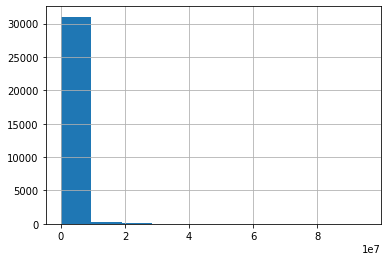

In [41]:
df.price.hist()

In [42]:
df.price.describe()

count    3.137900e+04
mean     1.201555e+06
std      2.651480e+06
min      0.000000e+00
25%      3.900000e+05
50%      6.890000e+05
75%      1.199888e+06
max      9.500000e+07
Name: price, dtype: float64

In [43]:
df.price.median()

689000.0

{'whiskers': [<matplotlib.lines.Line2D at 0x246b7481540>,
 'caps': [<matplotlib.lines.Line2D at 0x246b7481ba0>,
 'boxes': [<matplotlib.lines.Line2D at 0x246b7481270>],
 'medians': [<matplotlib.lines.Line2D at 0x246b7482080>],
 'fliers': [<matplotlib.lines.Line2D at 0x246b7482350>],
 'means': []}

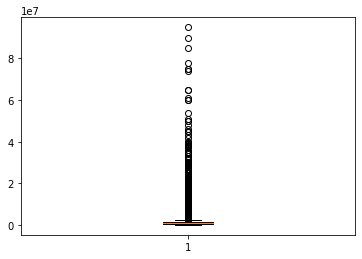

In [44]:
plt.boxplot(df.price)

A lot of outlier expensive estates, but I think that it's normal.

In [45]:
df[df.price > 1.199888e+06]

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
14,94564-2082711365,36958,2021-04-21,0,0,Listed for sale,1.618963e+12,2260000.0,0.0,Pinole,0,0 Pinon Ave,94564.0,-122.299049,38.004803,0,Rare and wonderful opportunity for a creative ...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County
16,94564-2076565393,36958,2020-12-05,0,0,Listed for sale,1.610496e+12,1200000.0,0.0,Pinole,0,2995 Pinole Valley Rd,94564.0,-122.284882,37.991123,0,Zoned commercial mixed use. City planning depa...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County
19,91605-19998959,12447,2021-07-13,0,0,Listed for sale,1.626048e+12,1200000.0,516.0,North Hollywood,1952,12421 Stagg St,91605.0,-118.403717,34.212372,0,"""Amazing location curb appeal and so much char...",2325.0,2325.0,sqft,4.0,5.0,0.0,1,2.0,1,One,0,0,0,0,SINGLE_FAMILY,Los Angeles County
25,91605-20004289,12447,2021-07-05,0,0,Price change,1.625616e+12,4600000.0,415.0,North Hollywood,2018,11740 Vanowen St,91605.0,-118.389328,34.193630,0,We are proud to present (Year Built 2019) cont...,11073.0,11073.0,sqft,0.0,0.0,11073.0,1,1.0,1,Three Or More,0,0,0,0,MULTI_FAMILY,Los Angeles County
33,91605-20003357,12447,2021-06-19,0,0,Listing removed,1.624320e+12,3000000.0,0.0,North Hollywood,0,11444 Vanowen St,91605.0,-118.380684,34.193665,0,We are very proud to present this extremely r...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Los Angeles County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35382,90036-20786205,12447,2021-06-22,0,0,Listed for sale,1.602634e+12,2249000.0,0.0,Los Angeles,1925,429 N Spaulding Ave,90036.0,-118.357658,34.079071,0,"""Gorgeous and charming 4-unit complex in highl...",0.0,0.0,sqft,0.0,0.0,3781.0,0,0.0,1,0,0,0,0,0,MULTI_FAMILY,Los Angeles County
35383,90036-20785299,12447,2021-06-22,0,0,Listed for sale,1.624320e+12,2295000.0,0.0,Los Angeles,1924,622 N Gardner St,90036.0,-118.352928,34.082546,0,Just completed side by side duplex in trendy M...,0.0,0.0,sqft,0.0,0.0,2247.0,0,0.0,0,0,0,0,0,0,MULTI_FAMILY,Los Angeles County
35384,90036-20610069,12447,2021-06-19,0,0,Listing removed,1.620259e+12,3360000.0,0.0,Los Angeles,1927,736 S Cloverdale Ave,90036.0,-118.346329,34.061150,0,Offering absolute privacy on a large flat lot ...,0.0,0.0,sqft,4.0,4.0,0.0,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County
35385,90036-20610391,12447,2021-06-17,0,0,Listing removed,1.624320e+12,1699000.0,958.0,Los Angeles,1924,937 Masselin Ave,90036.0,-118.354790,34.058182,0,"""Beautiful Mediterranean stunner centrally loc...",1774.0,1774.0,sqft,2.0,3.0,0.0,1,2.0,1,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County


In [46]:
df[df.price == 9.500000e+07]

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
24263,94920-2087176388,34285,2021-04-13,0,0,Listed for sale,1.618272e+12,95000000.0,0.0,Tiburon,0,624 Ridge Rd,94920.0,-122.45179,37.880928,0,"""Easton Point (aka the Martha Property) - San ...",0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Marin County


Yeah, it's okay, but they will confuse our test and models, so let's delete part of them. Hierarchical clustering is good for this task

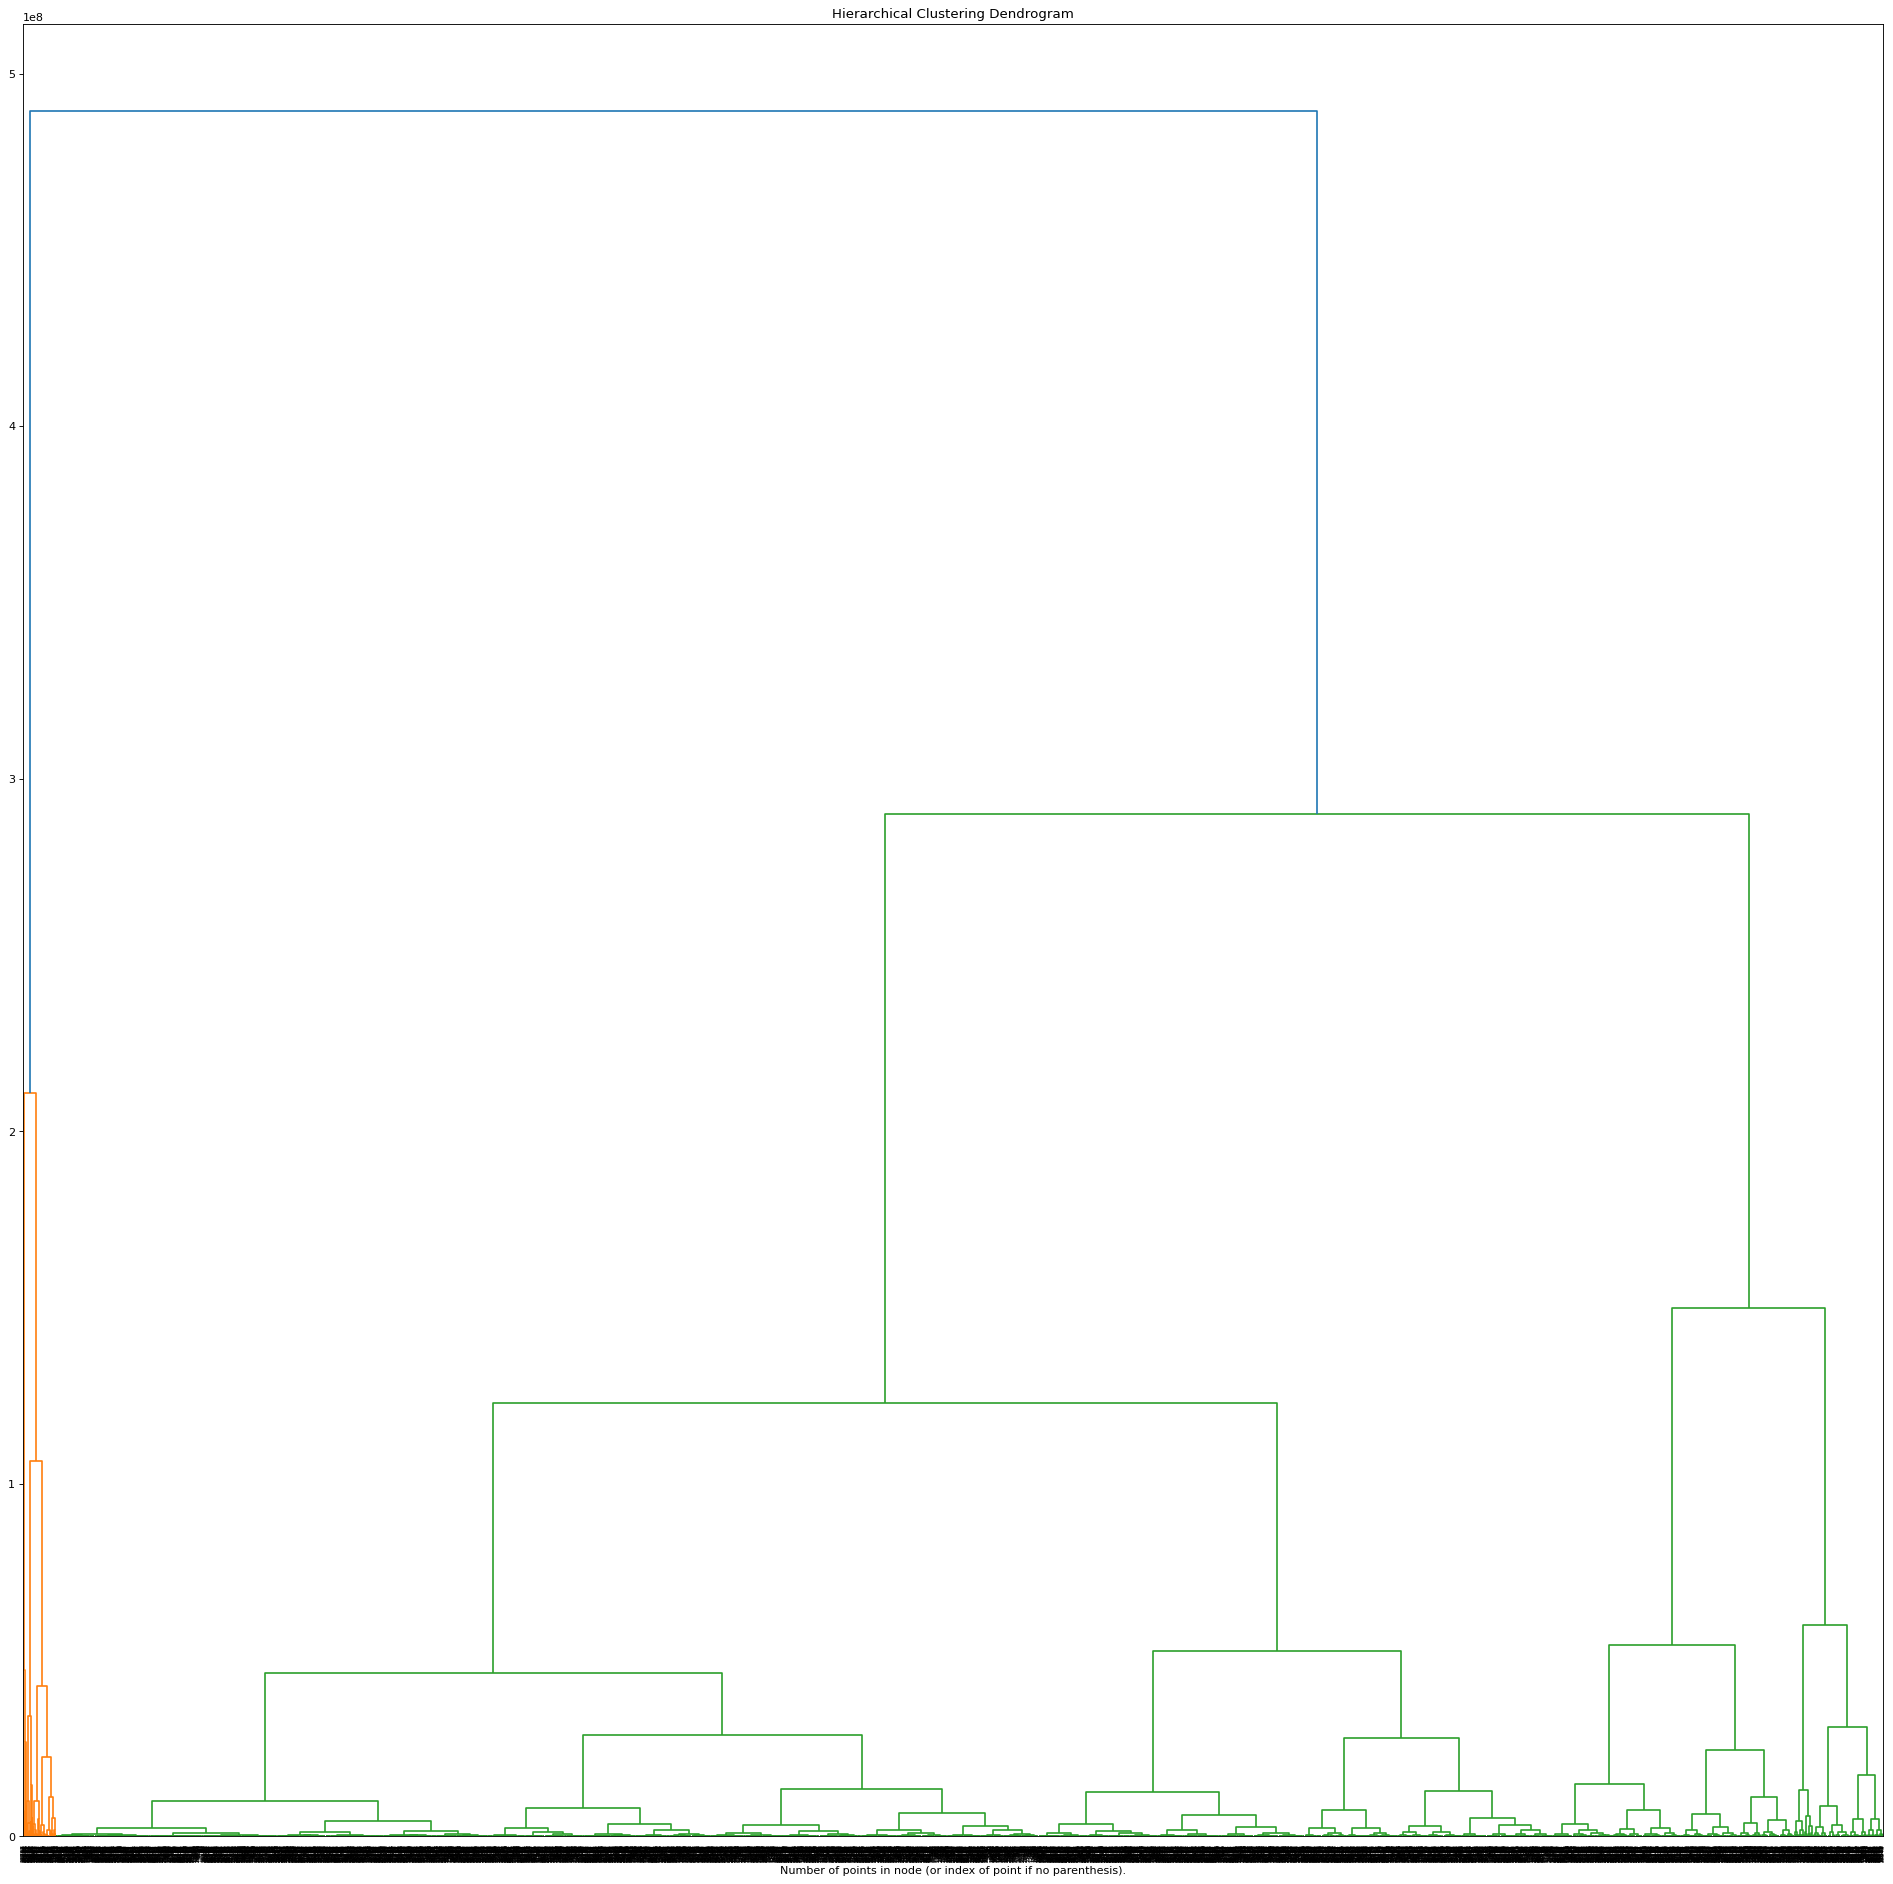

In [47]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from matplotlib.pyplot import figure

figure(figsize=(30, 30), dpi=80)

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df.price.to_numpy().reshape(-1, 1))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=15)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

So we see that left-orange cluster has his own life. And we can remove it

In [48]:
model = AgglomerativeClustering(n_clusters=2)

clusters = model.fit_predict(df.price.to_numpy().reshape(-1, 1))

In [49]:
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
df['priceCluster'] = clusters

In [51]:
df.priceCluster.describe()

count    31379.000000
mean         0.003824
std          0.061723
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: priceCluster, dtype: float64

In [52]:
df[df.priceCluster == 1].price.count()

120

In [53]:
df[df.priceCluster == 1].price.min()

18500000.0

estates with price above than 18500000 are got in this cluster. It's 120 samples

In [54]:
df.price.describe()

count    3.137900e+04
mean     1.201555e+06
std      2.651480e+06
min      0.000000e+00
25%      3.900000e+05
50%      6.890000e+05
75%      1.199888e+06
max      9.500000e+07
Name: price, dtype: float64

In [55]:
df[df.priceCluster == 0].price.describe()

count    3.125900e+04
mean     1.080492e+06
std      1.488252e+06
min      0.000000e+00
25%      3.900000e+05
50%      6.850000e+05
75%      1.199000e+06
max      1.800000e+07
Name: price, dtype: float64

In [56]:
import seaborn as sns

<AxesSubplot:>

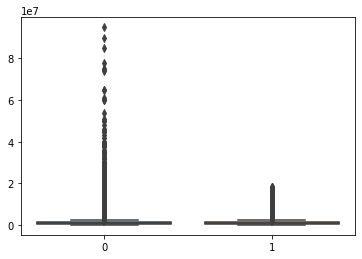

In [57]:
sns.boxplot(data = [df.price, df[df.priceCluster == 0].price])

Anyway boxplot shows outliers, but how can you see, situation much better

<AxesSubplot:>

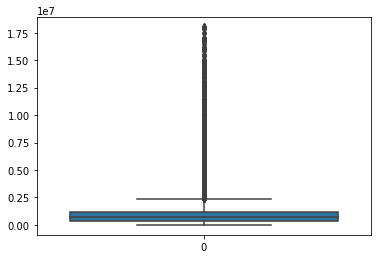

In [58]:
sns.boxplot(data = df[df.priceCluster == 0].price)

Now outliers are in one solid line

In [59]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county,priceCluster
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Placer County,0
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,0
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,0
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County,0
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County,0


In [60]:
df.lotAreaUnits.unique()

array(['Acres', 'sqft'], dtype=object)

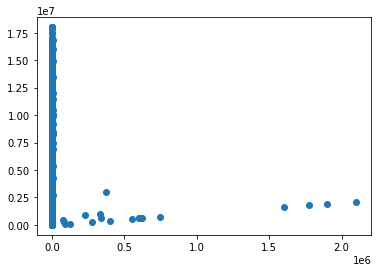

In [61]:
plt.scatter(df[df.priceCluster == 0].pricePerSquareFoot, df[df.priceCluster == 0].price)

In [62]:
(df.livingArea - df.livingAreaValue).describe()

count    31379.000000
mean        -0.835275
std        147.961618
min     -26210.096500
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
dtype: float64

I though there isn't differens between this columns, but there is.

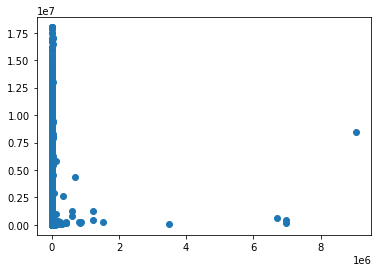

In [63]:
plt.scatter(df[df.priceCluster == 0].livingArea, df[df.priceCluster == 0].price)

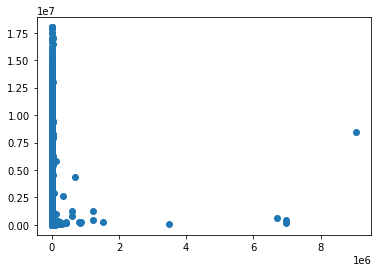

In [64]:
plt.scatter(df[df.priceCluster == 0].livingAreaValue, df[df.priceCluster == 0].price)

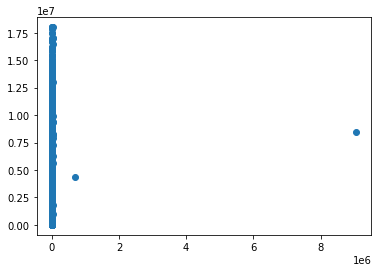

In [65]:
plt.scatter(df[df.priceCluster == 0].buildingArea, df[df.priceCluster == 0].price)

In [66]:
df.buildingArea.describe()

count    3.137900e+04
mean     7.420274e+02
std      5.132291e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.061351e+06
Name: buildingArea, dtype: float64

In [67]:
len(df.buildingArea.unique())

2758

In [68]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county,priceCluster
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Placer County,0
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,0
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,0
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County,0
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County,0


<BarContainer object of 6 artists>

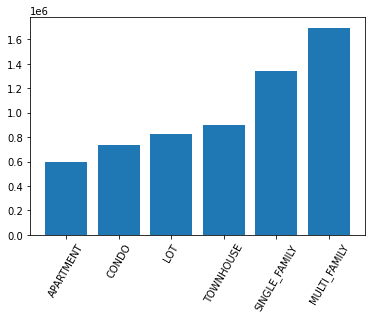

In [69]:
df_filtered = df.groupby(by = 'homeType', as_index = False).price.mean().sort_values('price')
plt.xticks(rotation=60)
plt.bar(df_filtered.homeType, df_filtered.price)

Apartment and condo are chepear than lot and townhouse. Lot and townhouse are chepear than houses for single and multi families

<BarContainer object of 58 artists>

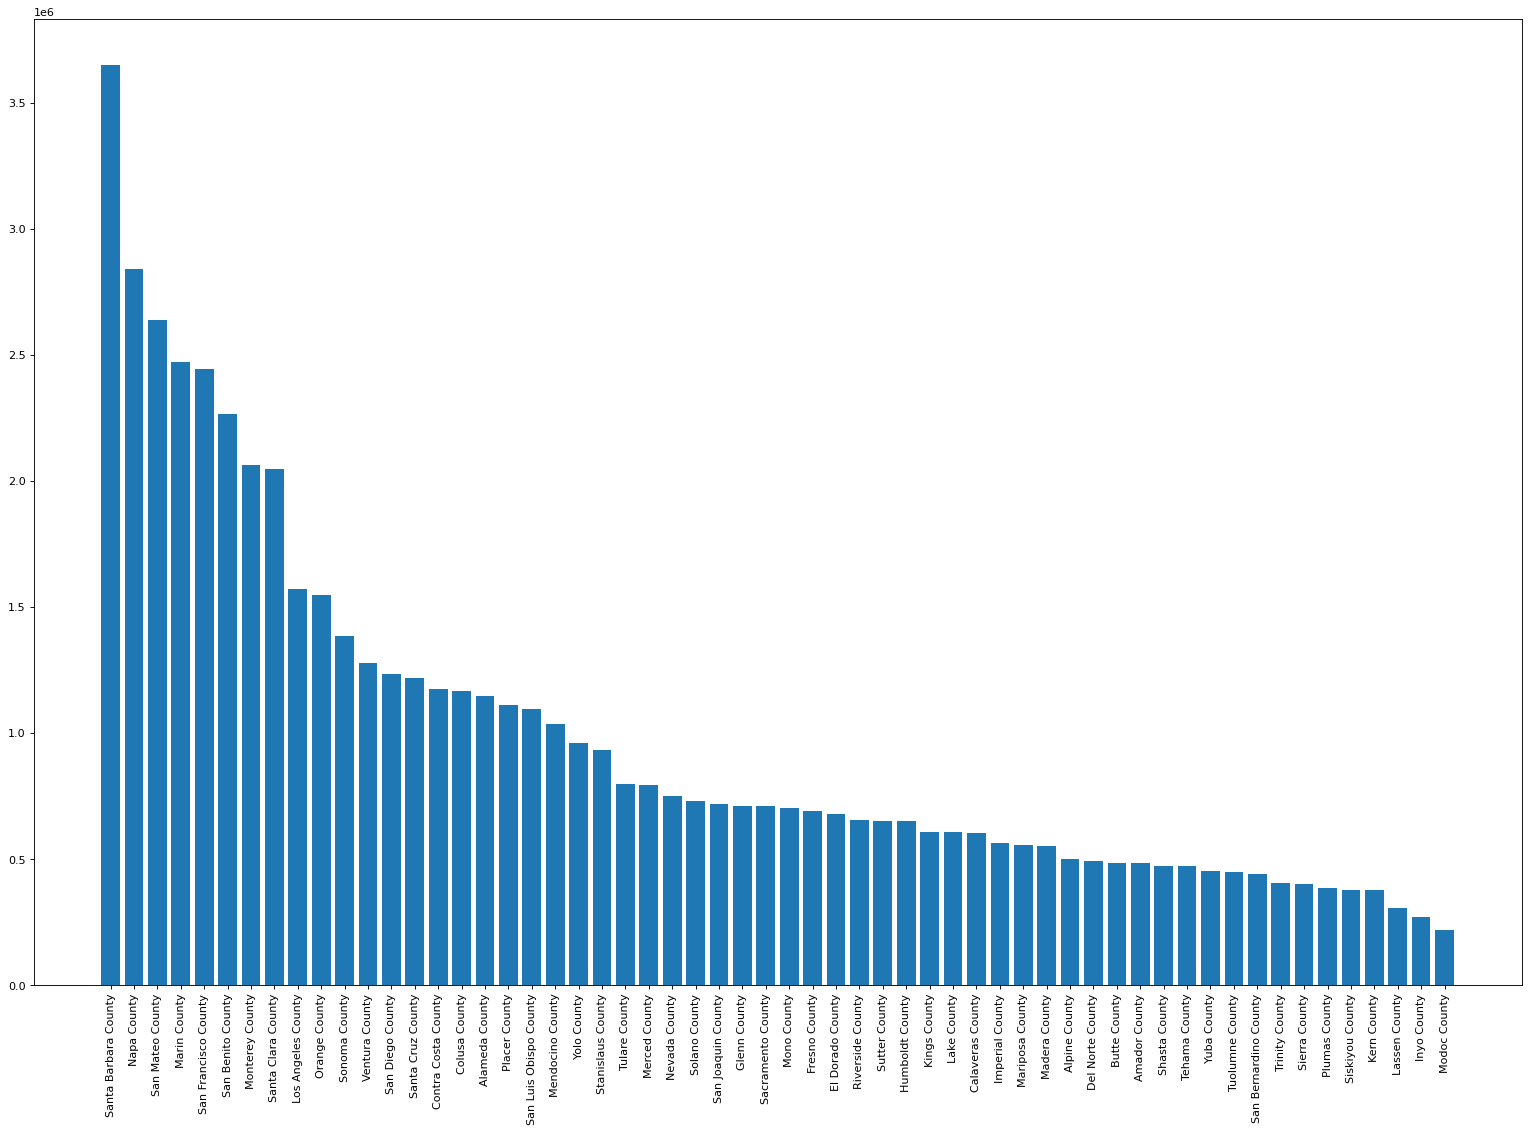

In [70]:
df_filtered = df.groupby(by = 'county', as_index = False).price.mean().sort_values('price', ascending = False)
figure(figsize=(24, 16), dpi=80)
plt.xticks(rotation=90)
plt.bar(df_filtered.county, df_filtered.price)

8 county have more expensive estates, but in other difference is more smooth

<BarContainer object of 48 artists>

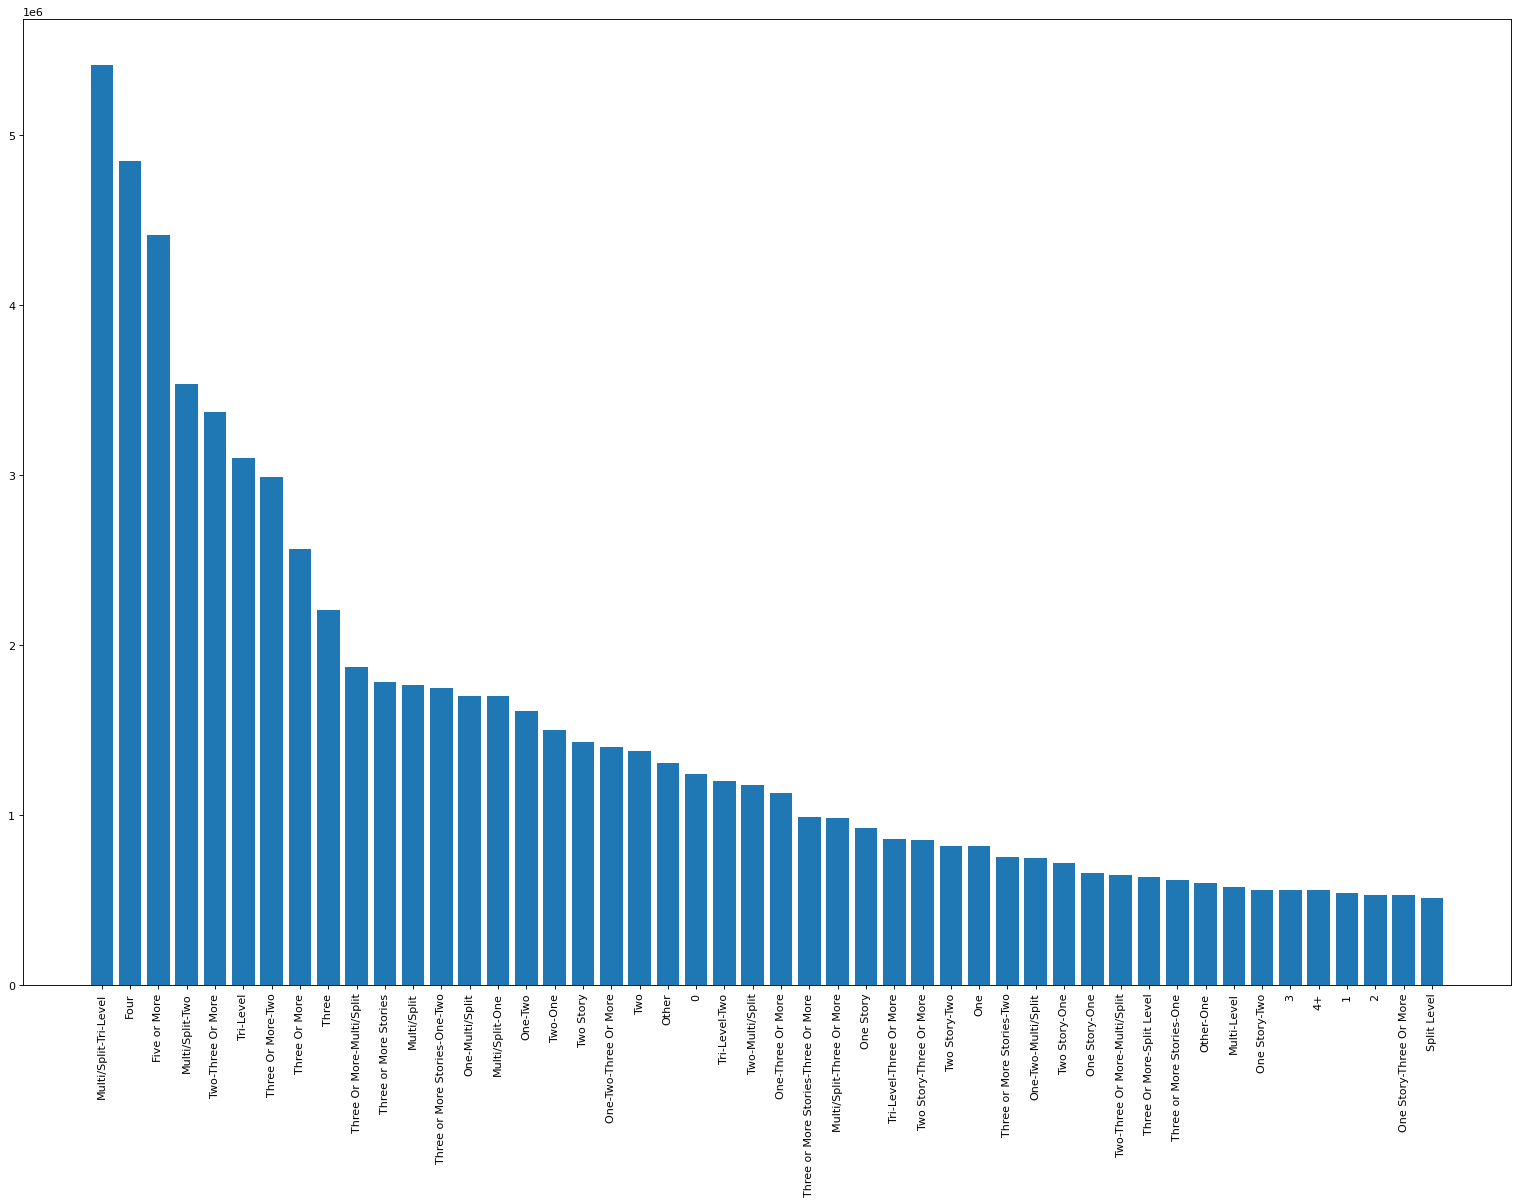

In [71]:
df_filtered = df.groupby(by = 'levels', as_index = False).price.mean().sort_values('price', ascending = False)
figure(figsize=(24, 16), dpi=80)
plt.xticks(rotation=90)
plt.bar(df_filtered.levels, df_filtered.price)

Ouch, a lot of different levels

In [72]:
#!!!!!!!!

In [73]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county,priceCluster
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Placer County,0
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,0
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,0
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County,0
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County,0


Here code for plotly interactive map, but my jupyter notebook lags with it, so I add screenshot. Also there was possibility to make size of markers according to prize and change color of marker by region.

In [74]:
'''import plotly.express as px
import pandas as pd

fig = px.scatter_geo(df,lat='latitude',lon='longitude', hover_name="id", scope = 'usa')
fig.update_layout(title_x=0.5)
fig.show()'''

'import plotly.express as px\nimport pandas as pd\n\nfig = px.scatter_geo(df,lat=\'latitude\',lon=\'longitude\', hover_name="id", scope = \'usa\')\nfig.update_layout(title_x=0.5)\nfig.show()'

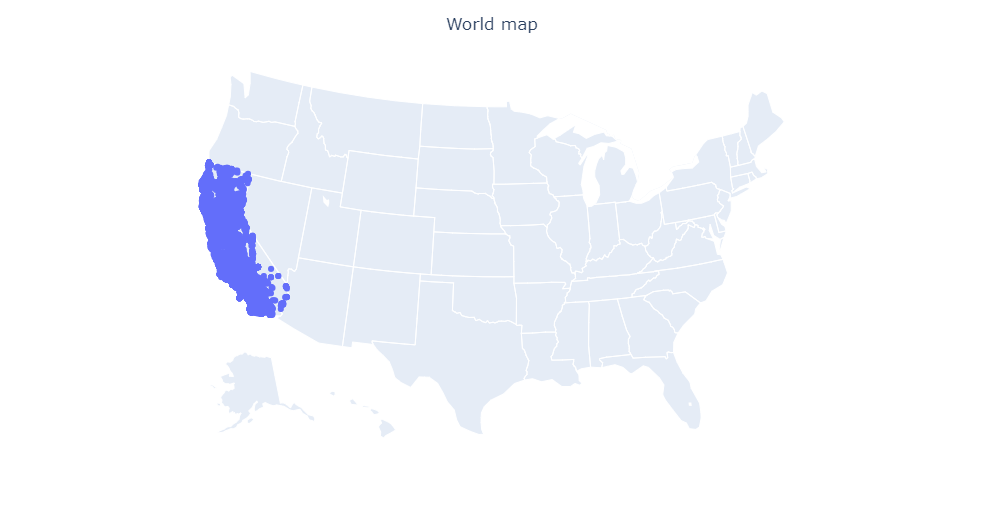

In [75]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county,priceCluster
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Placer County,0
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,0
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,0
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County,0
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County,0


<BarContainer object of 1236 artists>

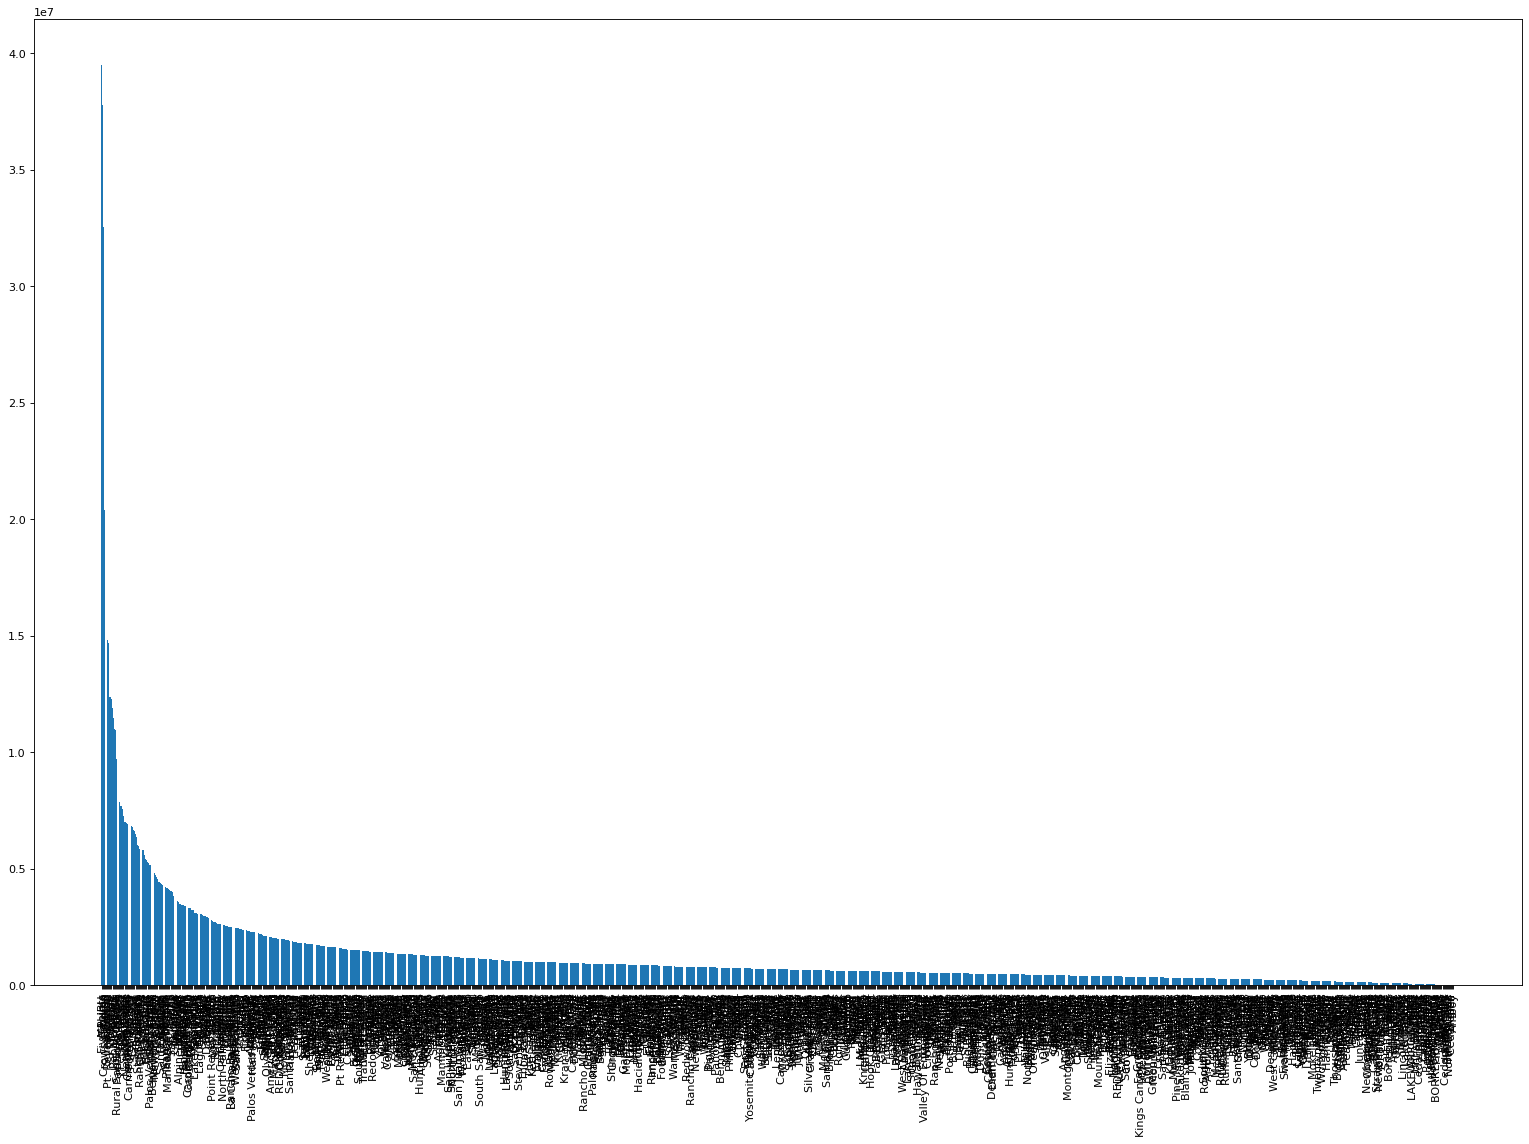

In [76]:
df_filtered = df.groupby(by = 'city', as_index = False).price.mean().sort_values('price', ascending = False)
figure(figsize=(24, 16), dpi=80)
plt.xticks(rotation=90)
plt.bar(df_filtered.city, df_filtered.price)

So here are some cities with much more expensive estates

<BarContainer object of 20 artists>

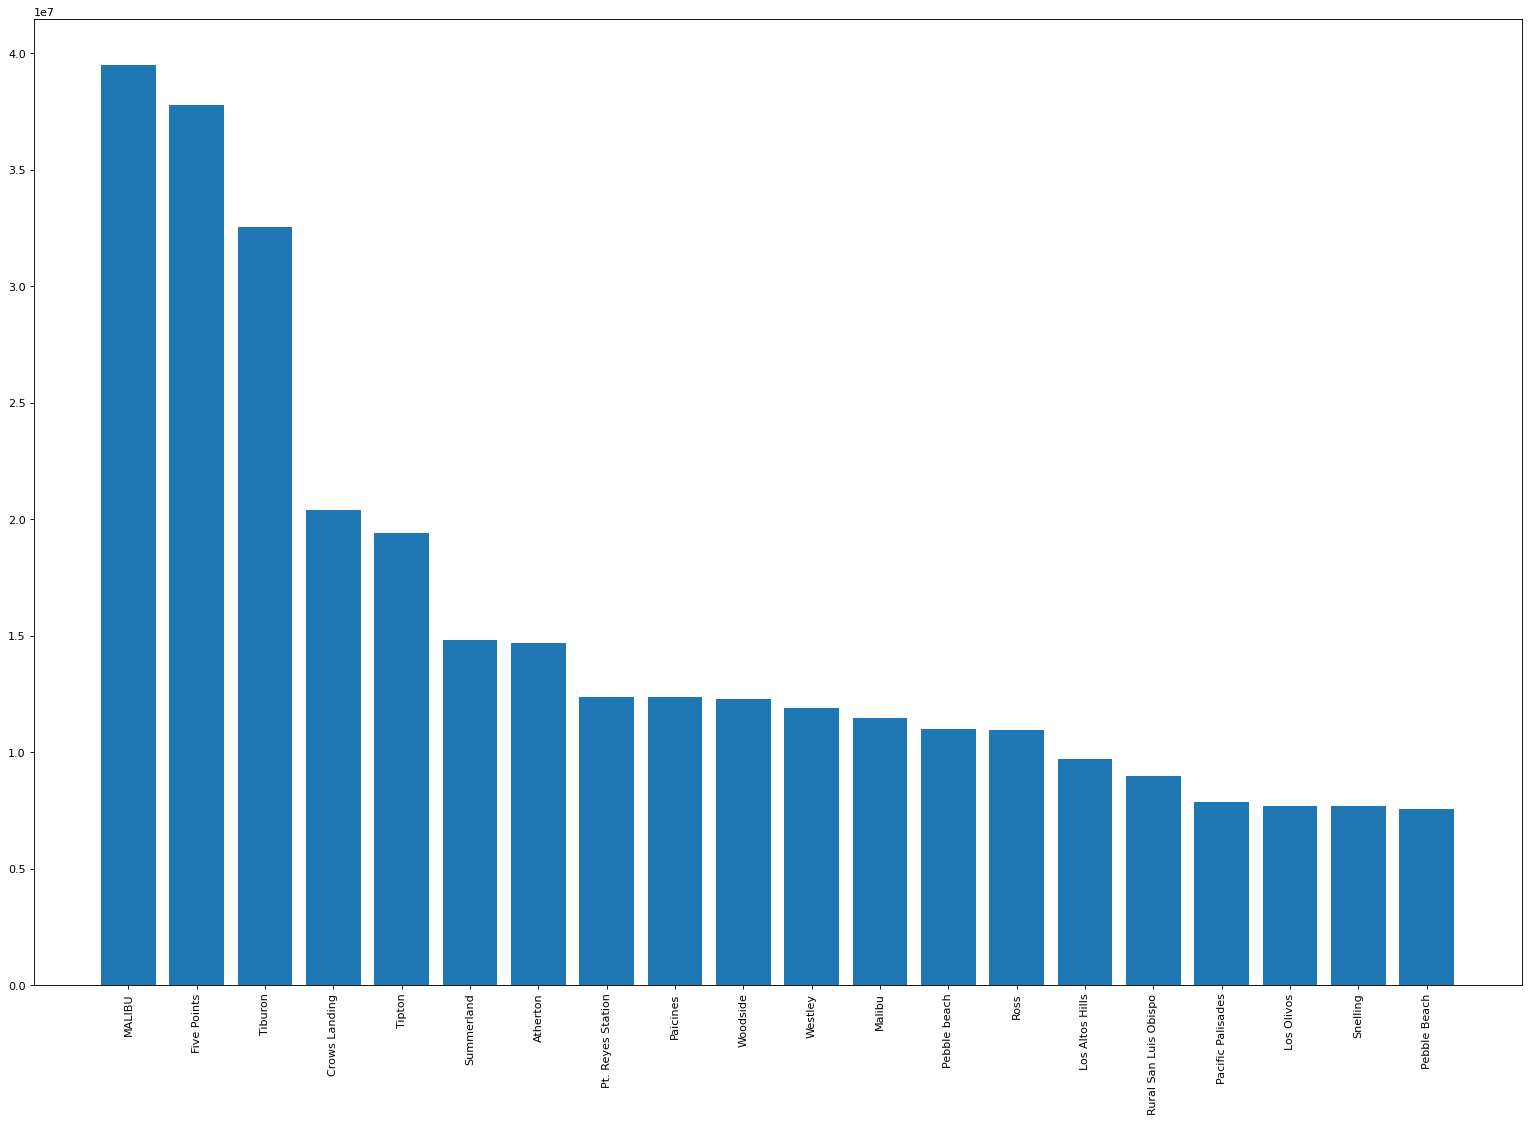

In [77]:
df_filtered = df.groupby(by = 'city', as_index = False).price.mean().sort_values('price', ascending = False)[:20]
figure(figsize=(24, 16), dpi=80)
plt.xticks(rotation=90)
plt.bar(df_filtered.city, df_filtered.price)

We can look at them here

In [78]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county,priceCluster
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Placer County,0
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,0
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,0
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County,0
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County,0


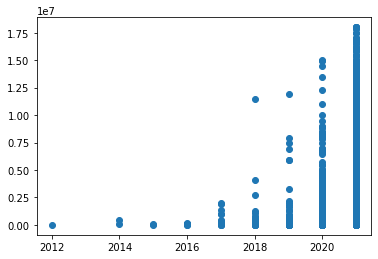

In [79]:
plt.scatter(df[df.priceCluster == 0].datePostedString.dt.year, df[df.priceCluster == 0].price)

So estates become more expensive

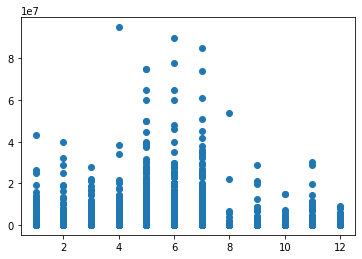

In [80]:
plt.scatter(df.datePostedString.dt.month, df.price)

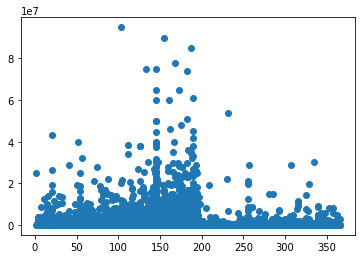

In [81]:
plt.scatter(df.datePostedString.dt.day_of_year, df.price)

So on last two plots we see that after half of year prices of samples are less

In [82]:
np.sort(df[df.priceCluster == 0].yearBuilt.unique())

array([   0, 1850, 1852, 1855, 1856, 1859, 1860, 1861, 1865, 1867, 1868,
       1869, 1870, 1873, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1883,
       1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895,
       1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906,
       1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
       1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 20

In [83]:
df[df.yearBuilt == 0].price.count()

5869

It's a real big group of samples

In [84]:
df[df.yearBuilt == 9999].price.count()

3

In [85]:
df[df.yearBuilt == 9999]

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county,priceCluster
5119,94124-2073153984,20330,2021-03-01,0,0,Price change,1.625789e+12,1100000.0,0.0,San Francisco,9999,1748 La Salle Ave,94124.0,-122.391235,37.738251,0,Duplex occupied by tenant. A big family occupy...,0.0,0.0,sqft,0.0,0.0,0.0,1,0.0,1,0,0,0,0,0,MULTI_FAMILY,San Francisco County,0
19941,96134-241549197,27485,2021-03-02,0,0,Listed for sale,1.614643e+12,602100.0,602100.0,Tulelake,9999,5427 E County Road 104,96134.0,-121.358490,41.961391,0,Certified organic farm! Opportunity to own 133...,1.0,1.0,Acres,2.0,3.0,1.0,0,0.0,0,One,0,0,0,0,SINGLE_FAMILY,Modoc County,0
19942,96134-2076426708,27485,2021-03-02,0,0,Listed for sale,1.614643e+12,604485.0,0.0,Tulelake,9999,0 County Road 107a,96134.0,-121.403877,41.989788,0,Certified organic farm! Opportunity to own 133...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,One,0,0,0,0,SINGLE_FAMILY,Modoc County,0


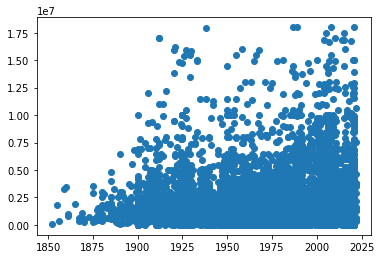

In [86]:
plt.scatter(df[(df.yearBuilt > 1850) & (df.yearBuilt < 2050) & (df.priceCluster == 0)].yearBuilt, df[(df.yearBuilt > 1850) & (df.yearBuilt < 2050) & (df.priceCluster == 0)].price)

'Young' building can be more expensive, but older ones usually can't

In [87]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county,priceCluster
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Placer County,0
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,0
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County,0
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County,0
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County,0


<BarContainer object of 2 artists>

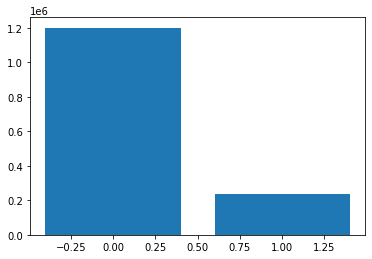

In [88]:
plt.bar(df.hasBadGeocode.unique(), df.groupby('hasBadGeocode').price.mean())

<BarContainer object of 26 artists>

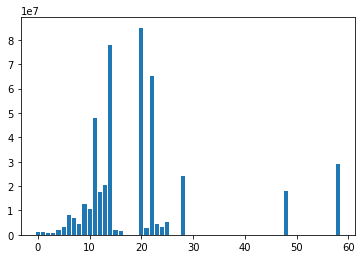

In [89]:
plt.bar(df.bathrooms.unique(), df.groupby('bathrooms').price.mean())

I'm not sure what kinds of buildings we have, but this peaks and low values after 20 make me confused

In [90]:
df[df.bathrooms > 20]

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county,priceCluster
1484,93702-2077537676,18203,2020-10-10,0,0,Listed for sale,1.624320e+12,2950000.0,127.0,Fresno,1971,4538 E Hamilton Ave,93702.0,-119.748352,36.724533,0,Excellent performing complex with great cash f...,23256.0,23256.0,Acres,28.0,56.0,0.0,0,0.0,0,0,0,0,0,0,MULTI_FAMILY,Fresno County,0
1992,93210-2072004960,4148,2021-04-05,0,0,Listed for sale,1.617581e+12,4500000.0,149.0,Coalinga,1985,654 Lucille Ave,93210.0,-120.371559,36.129566,0,Rents are 25% below market.Located in excellen...,30208.0,30208.0,Acres,48.0,80.0,0.0,0,0.0,0,0,0,0,0,0,MULTI_FAMILY,Fresno County,0
2178,93033-2096797388,13150,2021-07-12,0,0,Listed for sale,1.626048e+12,5300000.0,0.0,Oxnard,1958,309 Hill St,93033.0,-119.179962,34.186836,0,309 Hill Street Oxnard is part of a six-proper...,0.0,0.0,sqft,24.0,29.0,0.0,0,0.0,0,0,0,0,0,0,MULTI_FAMILY,Ventura County,0
8868,93067-248137743,7310,2021-05-25,0,0,Listing removed,1.624320e+12,65000000.0,1512.0,Summerland,2005,120 Montecito Ranch Ln,93067.0,-119.582726,34.418392,0,Welcome to Montecito paradise. This estate boa...,43000.0,43000.0,Acres,22.0,11.0,0.0,0,0.0,0,0,1,1,0,0,SINGLE_FAMILY,Santa Barbara County,1
17678,90077-20524392,12447,2021-07-06,0,0,Listed for sale,1.625530e+12,85000000.0,2833.0,Los Angeles,1939,10250 W Sunset Blvd,90077.0,-118.431534,34.081066,0,Nestled on nearly three rolling acres in the h...,30000.0,30000.0,Acres,25.0,17.0,0.0,0,0.0,0,0,1,1,0,0,SINGLE_FAMILY,Los Angeles County,1
17689,90077-2087104502,12447,2021-06-17,0,0,Listing removed,1.624320e+12,78000000.0,1902.0,Los Angeles,2020,10697 Somma Way,90077.0,-118.452248,34.091305,0,"""Welcome to UNICA a one-of-a-kind trophy estat...",41000.0,41000.0,Acres,21.0,8.0,0.0,0,0.0,0,0,1,1,0,0,SINGLE_FAMILY,Los Angeles County,1
21781,95554-2079780849,6106,2021-06-15,0,0,Listed for sale,1.623629e+12,1500000.0,97.0,Myers Flat,1960,12840 Avenue Of The Giants St,95554.0,-123.871391,40.266144,0,Excellent Investment Opportunity on the scenic...,15434.0,15434.0,Acres,23.0,0.0,15434.0,0,0.0,0,One Story,0,0,0,0,MULTI_FAMILY,Humboldt County,0
30409,93460-2077293318,26968,2020-11-02,0,0,Listed for sale,1.604275e+12,29000000.0,0.0,Santa Ynez,0,7355 Happy Canyon Rd,93460.0,-119.967796,34.635529,0,"""The Circle K Ranch is a palate of stunningly ...",0.0,0.0,Acres,58.0,52.0,0.0,0,0.0,0,0,0,1,0,1,SINGLE_FAMILY,Santa Barbara County,1


I have idea that there are posted building with living appartments, but in price column was writen like price for one appartment

To my mind, it's better to clear this samples

<BarContainer object of 13 artists>

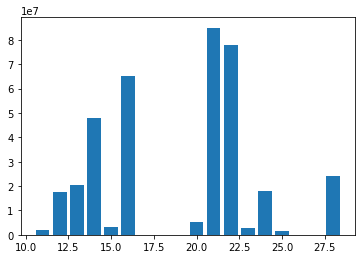

In [91]:
plt.bar(df[(df.bathrooms > 10) & (df.bathrooms < 30)].bathrooms.unique(), df[(df.bathrooms > 10) & (df.bathrooms < 30)].groupby('bathrooms').price.mean())

<BarContainer object of 21 artists>

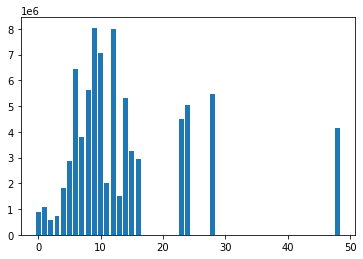

In [92]:
plt.bar(df[df.priceCluster == 0].bathrooms.unique(), df[df.priceCluster == 0].groupby('bathrooms').price.mean())

Okay, with this filter situation seems adequate. So let's apply our cluster filter for all our future work

In [93]:
df = df[df.priceCluster == 0]

In [94]:
df = df.drop('priceCluster', axis = 1)

In [95]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


<BarContainer object of 29 artists>

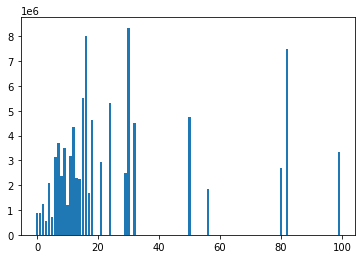

In [96]:
plt.bar(df.bedrooms.unique(), df.groupby('bedrooms').price.mean())

<BarContainer object of 2 artists>

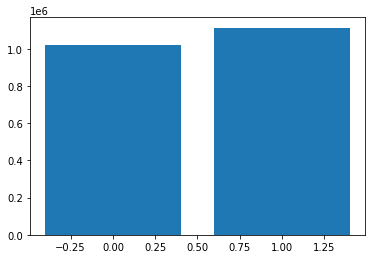

In [97]:
plt.bar(df.parking.unique(), df.groupby('parking').price.mean())

<BarContainer object of 2 artists>

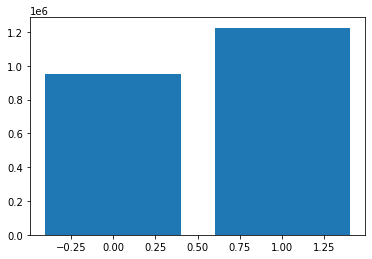

In [98]:
plt.bar(df.hasGarage.unique(), df.groupby('hasGarage').price.mean())

<BarContainer object of 29 artists>

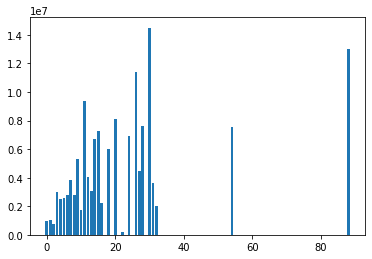

In [99]:
plt.bar(df.garageSpaces.unique(), df.groupby('garageSpaces').price.mean())

It seems that parking and has garage hasn't enought influence on price, so let's check it

(array([9633., 1057.,  274.,  124.,   79.,   53.,   21.,   14.,   10.,
          11.]),
 array([       0.,  1800000.,  3600000.,  5400000.,  7200000.,  9000000.,
        10800000., 12600000., 14400000., 16200000., 18000000.]),
 <BarContainer object of 10 artists>)

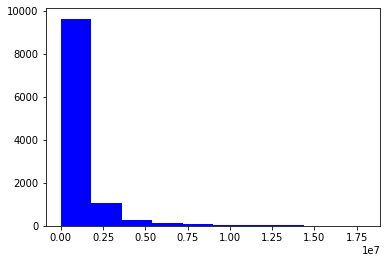

In [100]:
plt.hist(df[df.parking == 0].price, color = 'blue')

(array([1.7445e+04, 1.7340e+03, 4.1900e+02, 1.6700e+02, 8.8000e+01,
        4.8000e+01, 3.3000e+01, 2.0000e+01, 2.2000e+01, 7.0000e+00]),
 array([       0.,  1799500.,  3599000.,  5398500.,  7198000.,  8997500.,
        10797000., 12596500., 14396000., 16195500., 17995000.]),
 <BarContainer object of 10 artists>)

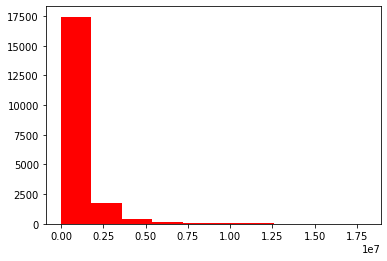

In [101]:
plt.hist(df[df.parking == 1].price, color = 'red')

In [102]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df[df.parking == 0].price, df[df.parking == 1].price)

In [103]:
stat

85786410.5

In [104]:
p

1.273689921930177e-269

In [105]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(df[df.parking == 0].price, df[df.parking == 1].price)

In [106]:
stat

-5.32761117762099

In [107]:
p

1.0020060019931337e-07

In [108]:
df[df.parking == 0].price.describe()

count    1.127600e+04
mean     1.020818e+06
std      1.658338e+06
min      0.000000e+00
25%      1.549000e+05
50%      4.990000e+05
75%      1.199000e+06
max      1.800000e+07
Name: price, dtype: float64

In [109]:
df[df.parking == 1].price.describe()

count    1.998300e+04
mean     1.114165e+06
std      1.381983e+06
min      0.000000e+00
25%      4.950000e+05
50%      7.380000e+05
75%      1.198000e+06
max      1.799500e+07
Name: price, dtype: float64

So both groups have the same distributions

(array([1.4362e+04, 1.3090e+03, 3.0800e+02, 1.4200e+02, 8.0000e+01,
        5.6000e+01, 2.9000e+01, 1.6000e+01, 1.0000e+01, 1.0000e+01]),
 array([       0.,  1800000.,  3600000.,  5400000.,  7200000.,  9000000.,
        10800000., 12600000., 14400000., 16200000., 18000000.]),
 <BarContainer object of 10 artists>)

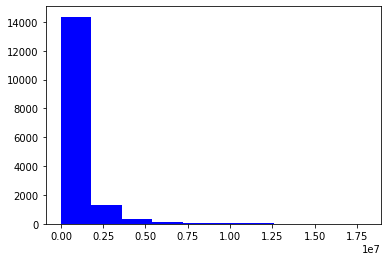

In [110]:
plt.hist(df[df.hasGarage == 0].price, color = 'blue')

(array([1.4362e+04, 1.3090e+03, 3.0800e+02, 1.4200e+02, 8.0000e+01,
        5.6000e+01, 2.9000e+01, 1.6000e+01, 1.0000e+01, 1.0000e+01]),
 array([       0.,  1800000.,  3600000.,  5400000.,  7200000.,  9000000.,
        10800000., 12600000., 14400000., 16200000., 18000000.]),
 <BarContainer object of 10 artists>)

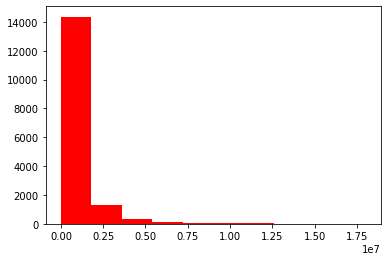

In [111]:
plt.hist(df[df.hasGarage == 0].price, color = 'red')

In [112]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df[df.hasGarage == 0].price, df[df.hasGarage == 1].price)

In [113]:
stat

86453067.5

In [114]:
p

0.0

In [115]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(df[df.hasGarage == 0].price, df[df.hasGarage == 1].price)

In [116]:
stat

-16.456936608690057

In [117]:
p

1.3459888845557744e-60

So for hasGarage too. We don't need them.

In [118]:
df = df.drop(['hasGarage', 'parking'], axis = 1)

In [119]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,0,LOT,Placer County
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,2.0,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,2.0,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1.0,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,0,LOT,Contra Costa County


<BarContainer object of 2 artists>

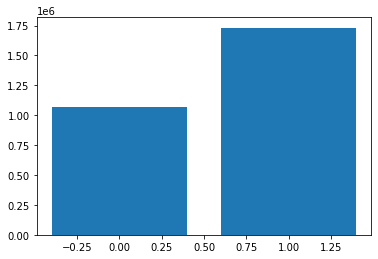

In [120]:
plt.bar(df.isNewConstruction.unique(), df.groupby('isNewConstruction').price.mean())

<BarContainer object of 2 artists>

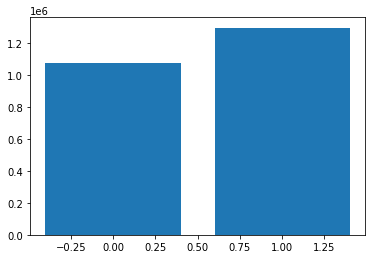

In [121]:
plt.bar(df.hasPetsAllowed.unique(), df.groupby('hasPetsAllowed').price.mean())

I'm not sure about significant of hasPetsAllowed too

In [122]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df[df.hasPetsAllowed == 0].price, df[df.hasPetsAllowed == 1].price)

In [123]:
stat

6289155.5

In [124]:
p

2.2957961441779535e-17

In [125]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(df[df.hasPetsAllowed == 0].price, df[df.hasPetsAllowed == 1].price)

In [126]:
p

0.0007268456028979324

So we can remove this feature too

In [127]:
df = df.drop('hasPetsAllowed', axis = 1)

In [128]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,Placer County
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,2.0,One Story,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,2.0,One Story,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1.0,Two Story,0,1,0,SINGLE_FAMILY,Contra Costa County
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,Contra Costa County


<BarContainer object of 2 artists>

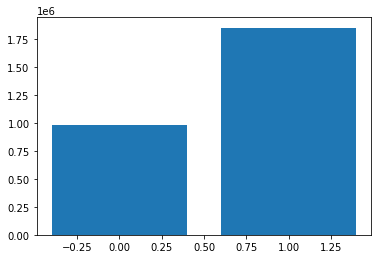

In [129]:
plt.bar(df.pool.unique(), df.groupby('pool').price.mean())

<BarContainer object of 2 artists>

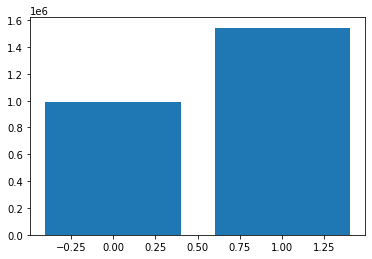

In [130]:
plt.bar(df.spa.unique(), df.groupby('spa').price.mean())

In [131]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,Placer County
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,2.0,One Story,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,2.0,One Story,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1.0,Two Story,0,1,0,SINGLE_FAMILY,Contra Costa County
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,Contra Costa County


Adress is unique for each building, but we can take only street

In [132]:
import re

In [133]:
def removeNum(street):
    if(re.findall(r'\d+', street)):
        return street.replace(re.findall(r'\d+', street)[0], '')
    else:
        return street

In [134]:
df['Street'] = df.streetAddress.apply(removeNum)

Let's make datetime encoding

In [135]:
df['day'] = df.datePostedString.dt.day_of_year

In [136]:
df['month'] = df.datePostedString.dt.month

In [137]:
df['week'] = df.datePostedString.dt.isocalendar().week

In [138]:
df['quarter'] = df.datePostedString.dt.quarter

In [139]:
import math

I missed to check on na values

In [140]:
df[df.day.isna()]

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter
19169,95825-2072008393,396020,NaT,0,0,None,NaN,0.0,0.0,Sacramento,1976,652 Woodside Sier,95825.0,-121.407272,38.578236,0,This 1228 square foot condo home has 2 bedroom...,1228.0,1228.0,sqft,2.0,2.0,0.0,0.0,0,1,0,0,CONDO,Sacramento County,Woodside Sier,NaN,NaN,<NA>,NaN
26025,95245-2072018019,15874,NaT,0,0,Listing removed,1.621037e+12,365000.0,254.0,Mokelumne Hill,1982,7215 Highway 26 #4,95245.0,-120.714874,38.291389,0,Amazing views and beautiful scenery from this ...,1437.0,1437.0,Acres,2.0,3.0,0.0,0.0,One,0,0,0,SINGLE_FAMILY,Calaveras County,Highway 26 #4,NaN,NaN,<NA>,NaN
34996,95683-2072025626,29536,NaT,0,0,Listing removed,1.624666e+12,644359.0,274.0,Sloughhouse,2019,14872 Oakville Ln LOT 26,95683.0,-121.095222,38.493057,0,This 2349 square foot single family home has 3...,2349.0,2349.0,sqft,2.0,3.0,0.0,0.0,0,0,0,0,SINGLE_FAMILY,Sacramento County,Oakville Ln LOT 26,NaN,NaN,<NA>,NaN


In [141]:
df.isna().any()

id                    False
cityId                False
datePostedString       True
is_bankOwned          False
is_forAuction         False
event                 False
time                   True
price                 False
pricePerSquareFoot    False
city                  False
yearBuilt             False
streetAddress         False
zipcode                True
longitude             False
latitude              False
hasBadGeocode         False
description            True
livingArea            False
livingAreaValue       False
lotAreaUnits          False
bathrooms             False
bedrooms              False
buildingArea          False
garageSpaces          False
levels                False
pool                  False
spa                   False
isNewConstruction     False
homeType              False
county                False
Street                False
day                    True
month                  True
week                   True
quarter                True
dtype: bool

So na we have only for 3 samples with date, zipcode and description. This 3 samples we can remove

In [142]:
df = df[~df.day.isna()]

In [143]:
df.isna().any()

id                    False
cityId                False
datePostedString      False
is_bankOwned          False
is_forAuction         False
event                 False
time                   True
price                 False
pricePerSquareFoot    False
city                  False
yearBuilt             False
streetAddress         False
zipcode                True
longitude             False
latitude              False
hasBadGeocode         False
description            True
livingArea            False
livingAreaValue       False
lotAreaUnits          False
bathrooms             False
bedrooms              False
buildingArea          False
garageSpaces          False
levels                False
pool                  False
spa                   False
isNewConstruction     False
homeType              False
county                False
Street                False
day                   False
month                 False
week                  False
quarter               False
dtype: bool

it's better

In [144]:
df['dayCos'] = df.day.apply(lambda x : np.cos(2* math.pi * x/df.day.max()))

In [145]:
df['weekCos'] = df.week.apply(lambda x : np.cos(2* math.pi * x/df.week.max()))

In [146]:
df['monthCos'] = df.month.apply(lambda x : np.cos(2* math.pi * x/df.month.max()))

In [147]:
df['quarterCos'] = df.quarter.apply(lambda x : np.cos(2* math.pi * x/df.quarter.max()))

In [148]:
df['year'] = df.datePostedString.dt.year

In [149]:
np.sort(df.dayCos.unique())

array([-1.        , -0.99985265, -0.99941063, -0.99941063, -0.99867409,
       -0.99764323, -0.99631836, -0.99469988, -0.99278825, -0.99278825,
       -0.99058404, -0.99058404, -0.9880879 , -0.9880879 , -0.98530056,
       -0.98222286, -0.98222286, -0.97885569, -0.97885569, -0.97520004,
       -0.97520004, -0.971257  , -0.971257  , -0.96702772, -0.96702772,
       -0.96251346, -0.95771554, -0.95771554, -0.95263538, -0.95263538,
       -0.94727447, -0.94727447, -0.9416344 , -0.9416344 , -0.93571682,
       -0.93571682, -0.92952348, -0.92952348, -0.92305621, -0.92305621,
       -0.9163169 , -0.9163169 , -0.90930756, -0.90930756, -0.90203024,
       -0.89448708, -0.89448708, -0.88668032, -0.88668032, -0.87861225,
       -0.87861225, -0.87028524, -0.87028524, -0.86170176, -0.86170176,
       -0.85286433, -0.85286433, -0.84377556, -0.84377556, -0.83443812,
       -0.83443812, -0.82485477, -0.82485477, -0.81502834, -0.81502834,
       -0.80496171, -0.80496171, -0.79465785, -0.79465785, -0.78

In [150]:
np.sort(df.weekCos.unique())

array([-0.99824373, -0.98423058, -0.95640098, -0.91514562, -0.91514562,
       -0.86104361, -0.86104361, -0.79485444, -0.79485444, -0.71750726,
       -0.71750726, -0.63008784, -0.63008784, -0.53382338, -0.53382338,
       -0.4300652 , -0.4300652 , -0.32026985, -0.32026985, -0.20597862,
       -0.20597862, -0.0887959 , -0.0887959 ,  0.02963333,  0.02963333,
        0.14764656,  0.14764656,  0.26358717,  0.26358717,  0.37582758,
        0.37582758,  0.4827922 ,  0.4827922 ,  0.58297948,  0.58297948,
        0.674983  ,  0.674983  ,  0.75751124,  0.75751124,  0.82940569,
        0.82940569,  0.88965709,  0.88965709,  0.93741966,  0.93741966,
        0.97202291,  0.9929811 ,  0.9929811 ,  1.        ])

In [151]:
np.sort(df.monthCos.unique())

array([-1.00000000e+00, -8.66025404e-01, -8.66025404e-01, -5.00000000e-01,
       -5.00000000e-01, -1.83697020e-16,  6.12323400e-17,  5.00000000e-01,
        8.66025404e-01,  8.66025404e-01,  1.00000000e+00])

In [152]:
np.sort(df.quarterCos.unique())

array([-1.0000000e+00, -1.8369702e-16,  6.1232340e-17,  1.0000000e+00])

In [153]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,Placer County,Moody Ridge Rd,13.0,1.0,2,1.0,0.975200,0.972023,0.866025,6.123234e-17,2021
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,2.0,One Story,0,0,0,SINGLE_FAMILY,Contra Costa County,Belden Ct,193.0,7.0,28,3.0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,2.0,One Story,0,0,0,SINGLE_FAMILY,Contra Costa County,Savage Ave,189.0,7.0,27,3.0,-0.994700,-0.998244,-0.866025,-1.836970e-16,2021
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1.0,Two Story,0,1,0,SINGLE_FAMILY,Contra Costa County,Plum St,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,Contra Costa County,Appian Way,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021


I wanna check situation with features which what we have already worked

<AxesSubplot:>

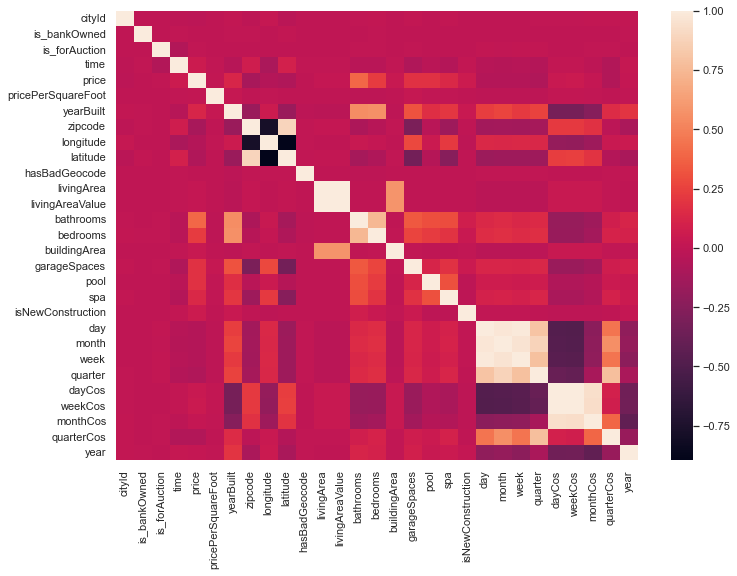

In [154]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr())

In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
targetScaler = StandardScaler()
df['priceScaled'] = targetScaler.fit_transform(df.price.to_numpy().reshape(-1, 1))

In [157]:
import statsmodels.api as sm

In [158]:
Xtrain = df[['is_bankOwned', 'is_forAuction', 'longitude' ,'latitude', 'hasBadGeocode','bathrooms', 'bedrooms',\
            'garageSpaces', 'pool', 'spa', 'isNewConstruction', 'dayCos', 'weekCos', 'monthCos', 'quarterCos', 'year']]
ytrain = df[['priceScaled']]
Xtrain = sm.add_constant(Xtrain)
lin_reg = sm.OLS(ytrain, Xtrain).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            priceScaled   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     654.8
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:28:49   Log-Likelihood:                -39831.
No. Observations:               31256   AIC:                         7.970e+04
Df Residuals:                   31239   BIC:                         7.984e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               222.1129     45.34

In [159]:
for col in ['is_bankOwned', 'is_forAuction', 'longitude' ,'latitude', 'hasBadGeocode','bathrooms', 'bedrooms',\
            'garageSpaces', 'pool', 'spa', 'isNewConstruction', 'dayCos', 'weekCos', 'monthCos', 'quarterCos', 'year']:

    Xtrain = df[col]
    ytrain = df[['priceScaled']]
    Xtrain = sm.add_constant(Xtrain)
    lin_reg = sm.OLS(ytrain, Xtrain).fit()
    print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            priceScaled   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.243
Date:                Fri, 04 Feb 2022   Prob (F-statistic):              0.265
Time:                        13:28:49   Log-Likelihood:                -44350.
No. Observations:               31256   AIC:                         8.870e+04
Df Residuals:                   31254   BIC:                         8.872e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.179e-05      0.006      0.011   

                            OLS Regression Results                            
Dep. Variable:            priceScaled   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     580.0
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          5.48e-127
Time:                        13:28:49   Log-Likelihood:                -44063.
No. Observations:               31256   AIC:                         8.813e+04
Df Residuals:                   31254   BIC:                         8.815e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0585      0.006     -9.580      0.0

Unusefull features - is_bankOwned, is_forAuction, hasBadGeocode
with year, longitude - posibly, we have some problems

In [160]:
Xtrain = df[['latitude','bathrooms', 'bedrooms',\
            'garageSpaces', 'pool', 'spa', 'isNewConstruction', 'dayCos', 'weekCos', 'monthCos', 'quarterCos']]
ytrain = df[['priceScaled']]
Xtrain = sm.add_constant(Xtrain)
lin_reg = sm.OLS(ytrain, Xtrain).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            priceScaled   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     724.0
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:28:49   Log-Likelihood:                -40802.
No. Observations:               31256   AIC:                         8.163e+04
Df Residuals:                   31244   BIC:                         8.173e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3919      0.09

<AxesSubplot:>

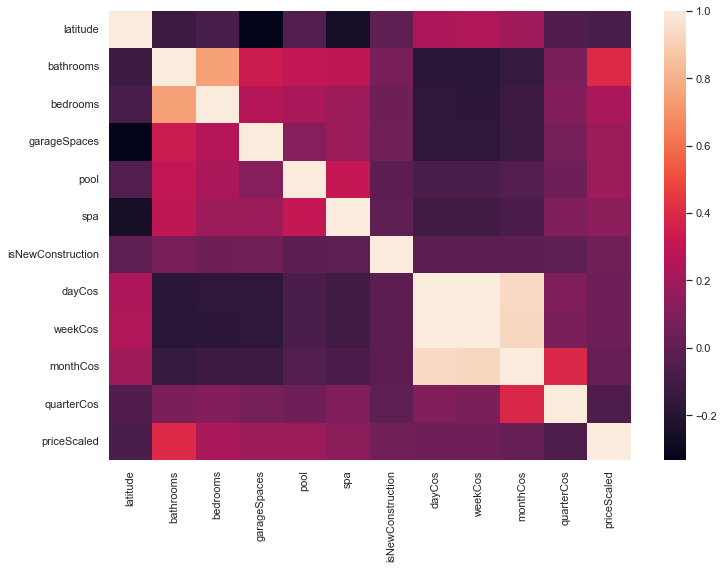

In [161]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df[['latitude','bathrooms', 'bedrooms',\
            'garageSpaces', 'pool', 'spa', 'isNewConstruction', 'dayCos', 'weekCos', 'monthCos', 'quarterCos', 'priceScaled']].corr())

We can see that weekCos, monthCos and dayCos have strong correlation, let's check which feature will be better to leave.
Also intresting that with price the strongest correlation is count of bathrooms

In [162]:
for col in ['dayCos', 'weekCos', 'monthCos', 'quarterCos']:

    Xtrain = df[col]
    ytrain = df[['priceScaled']]
    Xtrain = sm.add_constant(Xtrain)
    lin_reg = sm.OLS(ytrain, Xtrain).fit()
    print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            priceScaled   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     58.86
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           1.74e-14
Time:                        13:28:49   Log-Likelihood:                -44321.
No. Observations:               31256   AIC:                         8.865e+04
Df Residuals:                   31254   BIC:                         8.866e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1073      0.015      7.114      0.0

quarterCos has the best R2(but only 0.004) and enought big coef

In [163]:
Xtrain = df[['latitude','bathrooms', 'bedrooms',\
            'garageSpaces', 'pool', 'spa', 'isNewConstruction','quarterCos']]
ytrain = df[['priceScaled']]
Xtrain = sm.add_constant(Xtrain)
lin_reg = sm.OLS(ytrain, Xtrain).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            priceScaled   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     880.8
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:28:50   Log-Likelihood:                -41172.
No. Observations:               31256   AIC:                         8.236e+04
Df Residuals:                   31247   BIC:                         8.244e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3914      0.08

Which features have more possitive/negative influence on price you can seen by coefs

But we had problems with multicollinearity or something like that, so i want to try regularization

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
Xtrain = df[['longitude' ,'latitude','bathrooms', 'bedrooms',\
            'garageSpaces', 'pool', 'spa', 'isNewConstruction', 'dayCos', 'weekCos', 'monthCos', 'quarterCos', 'year']]
ytrain = df[['price']]

Tree and tree based models aren't suitable, because price can't be limited.
So it's better to use linear models, because they aren't limited, good work with num and cat features

In [166]:
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 10000, random_state = 42)

In [167]:
from sklearn.linear_model import ElasticNet

In [168]:
elasticNet = ElasticNet(random_state = 42)
elasticNet.fit(X_train, y_train)

ElasticNet(random_state=42)

In [169]:
elasticNet.score(X_train, y_train)

0.21384847578775945

In [170]:
elasticNet.score(X_test, y_test)

0.2111319125897987

In [171]:
from sklearn.metrics import mean_absolute_error

In [172]:
mean_absolute_error(y_train, elasticNet.predict(X_train))

694214.0778408723

In [173]:
mean_absolute_error(y_test, elasticNet.predict(X_test))

688865.2942223895

There isn't overlearning

In [174]:
df.price.describe()

count    3.125600e+04
mean     1.080564e+06
std      1.488304e+06
min      0.000000e+00
25%      3.900000e+05
50%      6.850000e+05
75%      1.199000e+06
max      1.800000e+07
Name: price, dtype: float64

And MAE isn't so big

In [175]:
from sklearn.linear_model import Ridge

In [176]:
ridge = Ridge(random_state = 42)
ridge.fit(X_train, y_train)

Ridge(random_state=42)

In [177]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print(mean_absolute_error(y_train, ridge.predict(X_train)))
print(mean_absolute_error(y_test, ridge.predict(X_test)))

0.25342822654528596
0.2449521580725459
696928.3927178852
694823.352673645


R2 better, MAE is the same

In [178]:
from sklearn.linear_model import Lasso

In [179]:
lasso = Lasso(random_state = 42, max_iter = 10000)
lasso.fit(X_train, y_train)

Lasso(max_iter=10000, random_state=42)

In [180]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print(mean_absolute_error(y_train, lasso.predict(X_train)))
print(mean_absolute_error(y_test, lasso.predict(X_test)))

0.2535006744499253
0.24453565894222506
696831.6079083817
695011.0698091346


Result is the same to Ridge

Let's look what we can make up more

In [181]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,Placer County,Moody Ridge Rd,13.0,1.0,2,1.0,0.975200,0.972023,0.866025,6.123234e-17,2021,-0.628621
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,2.0,One Story,0,0,0,SINGLE_FAMILY,Contra Costa County,Belden Ct,193.0,7.0,28,3.0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,-0.272505
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,2.0,One Story,0,0,0,SINGLE_FAMILY,Contra Costa County,Savage Ave,189.0,7.0,27,3.0,-0.994700,-0.998244,-0.866025,-1.836970e-16,2021,-0.289975
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1.0,Two Story,0,1,0,SINGLE_FAMILY,Contra Costa County,Plum St,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.323571
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,Contra Costa County,Appian Way,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.525146


In [182]:
df.groupby('Street', as_index = False).price.count().sort_values('price')

,Street,price
11691,Marigold St,1
14933,Persimmon Way,1
14932,Persimmon Ln,1
14930,Persian Dr SPACE 52,1
14929,Pershing St,1
...,...,...
288,4th St,23
255,3rd St,24
22891,Coming Soon Plan,25
3676,Central Ave,26


In [183]:
df_filtered = df.groupby('Street', as_index = False).price.count().sort_values('price', ascending = False)

In [184]:
df_filtered

,Street,price
11497,Main St,49
3676,Central Ave,26
22891,Coming Soon Plan,25
255,3rd St,24
288,4th St,23
...,...,...
8592,Halsey Ct,1
8591,Halogen Cir #204-B1,1
8590,Halley St,1
8589,Hallelujah,1


KeyboardInterrupt: 

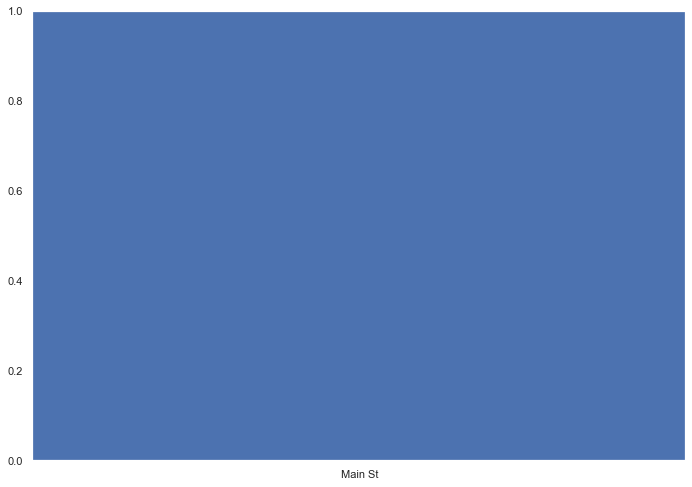

In [185]:
plt.bar(df_filtered.Street, df_filtered.price)

In [187]:
df_filtered[df_filtered.price > 5]

,Street,price
11497,Main St,49
3676,Central Ave,26
22891,Coming Soon Plan,25
255,3rd St,24
288,4th St,23
...,...,...
13915,O St,6
12680,Mountain View Ave,6
6415,E St,6
21792,Western Ave,6


In [188]:
df[df.Street.isin(df_filtered[df_filtered.price > 5].Street.to_numpy())]

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled
28,91605-20002976,12447,2021-06-30,0,0,Listed for sale,1.625011e+12,879999.0,427.0,North Hollywood,1959,11924 Saticoy St,91605.0,-118.393127,34.208183,0,Stunning 2060 Sq. Ft. Home North Hollywood on ...,2060.0,2060.0,sqft,2.0,4.0,0.0,2.0,One,0,0,0,SINGLE_FAMILY,Los Angeles County,Saticoy St,181.0,6.0,26,2.0,-0.999411,-0.998244,-1.000000,-1.000000e+00,2021,-0.134763
43,91030-20693101,27183,2021-07-12,0,0,Listed for sale,1.626048e+12,1275000.0,763.0,South Pasadena,1924,651 Forest Ave,91030.0,-118.164803,34.117790,0,"""Located on a charming street in South Pasaden...",1672.0,1672.0,sqft,2.0,3.0,0.0,1.0,Two,0,1,0,SINGLE_FAMILY,Los Angeles County,Forest Ave,193.0,7.0,28,3.0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,0.130645
60,91103-20863892,47019,2021-07-09,0,0,Listed for sale,1.625789e+12,639888.0,640.0,Pasadena,1928,810 Lincoln Ave,91103.0,-118.156281,34.158741,0,"""Location Location Location! Walking distance ...",1000.0,1000.0,sqft,1.0,2.0,0.0,1.0,One,0,0,0,SINGLE_FAMILY,Los Angeles County,Lincoln Ave,190.0,7.0,27,3.0,-0.992788,-0.998244,-0.866025,-1.836970e-16,2021,-0.296097
88,95125-19686457,33839,2021-06-15,0,0,Listing removed,1.624320e+12,1250000.0,1411.0,San Jose,1922,888 Pine Ave,95125.0,-121.887535,37.300655,0,"""Attention all investors contractors and devel...",886.0,886.0,sqft,1.0,2.0,0.0,0.0,0,0,0,0,SINGLE_FAMILY,Santa Clara County,Pine Ave,166.0,6.0,24,2.0,-0.957716,-0.956401,-1.000000,-1.000000e+00,2021,0.113847
94,90031-82883298,12447,2021-07-13,0,0,Listed for sale,1.626134e+12,1500000.0,257.0,Los Angeles,1949,2653 Pasadena Ave,90031.0,-118.215744,34.078384,0,Rare opportunity to own 6 units on a HUGE 1700...,5827.0,5827.0,Acres,0.0,0.0,5827.0,2.0,0,0,0,0,MULTI_FAMILY,Los Angeles County,Pasadena Ave,194.0,7.0,28,3.0,-0.982223,-0.984231,-0.866025,-1.836970e-16,2021,0.281826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35324,91905-95035918,48738,2021-06-14,0,0,Listing removed,1.624320e+12,50000.0,0.0,Boulevard,0,Highway 94,91905.0,-116.302292,32.667133,0,Lot 3 of 4 Current use is zoned residential w...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,San Diego County,Highway,165.0,6.0,24,2.0,-0.952635,-0.956401,-1.000000,-1.000000e+00,2021,-0.692453
35325,91905-2070227010,48738,2021-06-14,0,0,Listing removed,1.624320e+12,75000.0,0.0,Boulevard,0,39746 Old Highway 80,91905.0,-116.292686,32.669170,0,Lot 4 of 4 property has well electric and addr...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,San Diego County,Old Highway 80,165.0,6.0,24,2.0,-0.952635,-0.956401,-1.000000,-1.000000e+00,2021,-0.675655
35326,91905-17149820,48738,2021-06-05,0,0,Price change,1.625530e+12,289000.0,332.0,Boulevard,1923,39718 Old Highway 80,91905.0,-116.293671,32.669106,0,Cute 2 bedroom 1 bath home with approximately ...,870.0,870.0,Acres,1.0,2.0,0.0,0.0,One,0,1,0,SINGLE_FAMILY,San Diego County,Old Highway 80,156.0,6.0,22,2.0,-0.894487,-0.861044,-1.000000,-1.000000e+00,2021,-0.531865
35329,91905-2077763127,48738,2021-05-25,0,0,Listing removed,1.624320e+12,249000.0,0.0,Boulevard,0,40945 Old Highway 80,91905.0,-116.262970,32.655430,0,GREAT VALUE! 107 +/- acres of pristine natures...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,San Diego County,Old Highway 80,145.0,5.0,21,2.0,-0.794658,-0.794854,-0.866025,-1.000000e+00,2021,-0.558741


In [194]:
df.to_csv('Save.csv')

In [196]:
df.loc[df.Street.isin(df_filtered[df_filtered.price < 2].Street.to_numpy()), 'Street'] = 'other'

In [197]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,Placer County,other,13.0,1.0,2,1.0,0.975200,0.972023,0.866025,6.123234e-17,2021,-0.628621
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,2.0,One Story,0,0,0,SINGLE_FAMILY,Contra Costa County,other,193.0,7.0,28,3.0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,-0.272505
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,2.0,One Story,0,0,0,SINGLE_FAMILY,Contra Costa County,other,189.0,7.0,27,3.0,-0.994700,-0.998244,-0.866025,-1.836970e-16,2021,-0.289975
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1.0,Two Story,0,1,0,SINGLE_FAMILY,Contra Costa County,other,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.323571
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,Contra Costa County,Appian Way,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.525146


In [198]:
df.Street.unique()

array(['other', ' Appian Way', ' Doidge Ave', ..., ' Alpine Ln', ' Lo Ln',
       ' Jacqueline Rd'], dtype=object)

In [199]:
df.groupby('Street', as_index = False).price.count().sort_values('price', ascending = False)

,Street,price
4171,other,19211
2109,Main St,49
669,Central Ave,26
4153,Coming Soon Plan,25
79,3rd St,24
...,...,...
1844,Karen Ave,2
1845,Karen Ct,2
1846,Karen Dr,2
1847,Kaweah River Dr,2


In [201]:
df['streetFreqEnc'] = df.Street.map(df.groupby('Street').size()/len(df))

In [202]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled,streetFreqEnc
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,Gold Run,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,Placer County,other,13.0,1.0,2,1.0,0.975200,0.972023,0.866025,6.123234e-17,2021,-0.628621,0.614634
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,2.0,One Story,0,0,0,SINGLE_FAMILY,Contra Costa County,other,193.0,7.0,28,3.0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,-0.272505,0.614634
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,2.0,One Story,0,0,0,SINGLE_FAMILY,Contra Costa County,other,189.0,7.0,27,3.0,-0.994700,-0.998244,-0.866025,-1.836970e-16,2021,-0.289975,0.614634
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1.0,Two Story,0,1,0,SINGLE_FAMILY,Contra Costa County,other,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.323571,0.614634
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,Contra Costa County,Appian Way,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.525146,0.000096


<BarContainer object of 1233 artists>

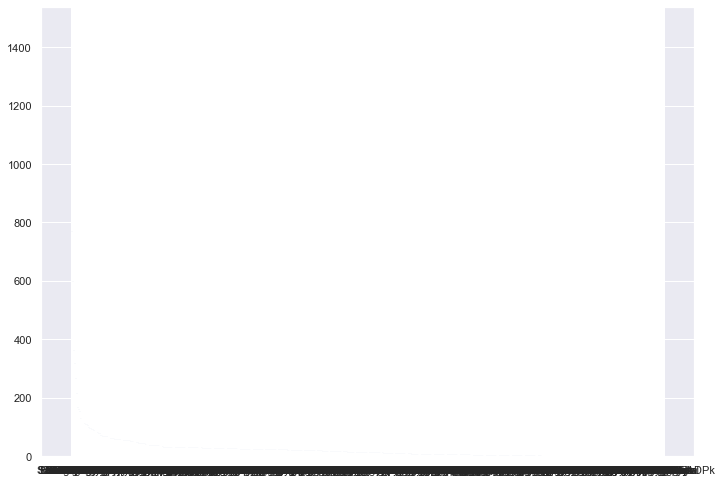

In [206]:
df_filtered = df.groupby('city', as_index = False).price.count().sort_values('price', ascending = False)
plt.bar(df_filtered.city, df_filtered.price)

<BarContainer object of 58 artists>

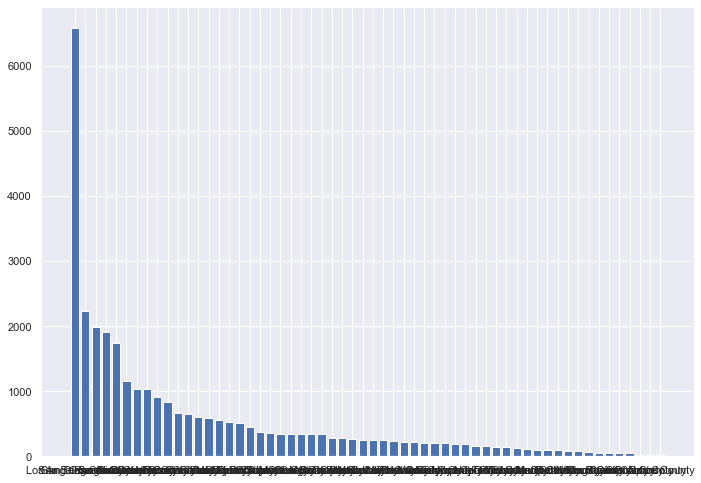

In [209]:
df_filtered = df.groupby('county', as_index = False).price.count().sort_values('price', ascending = False)
plt.bar(df_filtered.county, df_filtered.price)

<BarContainer object of 6 artists>

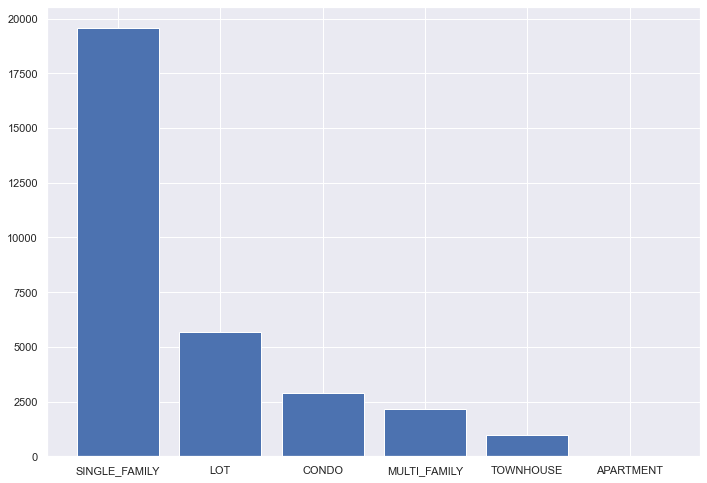

In [210]:
df_filtered = df.groupby('homeType', as_index = False).price.count().sort_values('price', ascending = False)
plt.bar(df_filtered.homeType, df_filtered.price)

In [211]:
df['homeTypeFreqEnc'] = df.homeType.map(df.groupby('homeType').size()/len(df))

In [212]:
df.groupby('city', as_index = False).price.count().sort_values('price', ascending = False)

,city,price
624,Los Angeles,1465
954,San Diego,771
957,San Francisco,600
940,Sacramento,599
962,San Jose,535
...,...,...
631,Los gatos,1
623,Los Altos Hills,1
1,29 Palms,1
612,Loma Mar,1


In [213]:
df_filtered = df.groupby('city', as_index = False).price.count()

In [216]:
df_filtered[df_filtered.price > 5]

,city,price
2,Acampo,13
3,Acton,24
4,Adelanto,29
7,Agoura Hills,28
9,Ahwahnee,11
...,...,...
1225,Yreka,23
1226,Yuba City,58
1227,Yucaipa,25
1228,Yucca Valley,37


In [222]:
df.loc[df.city.isin(df_filtered[df_filtered.price <= 5].city.to_numpy()), 'city'] = 'other'

In [223]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled,streetFreqEnc,homeTypeFreqEnc
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,other,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,Placer County,other,13.0,1.0,2,1.0,0.975200,0.972023,0.866025,6.123234e-17,2021,-0.628621,0.614634,0.182045
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,2.0,One Story,0,0,0,SINGLE_FAMILY,Contra Costa County,other,193.0,7.0,28,3.0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,-0.272505,0.614634,0.625928
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,2.0,One Story,0,0,0,SINGLE_FAMILY,Contra Costa County,other,189.0,7.0,27,3.0,-0.994700,-0.998244,-0.866025,-1.836970e-16,2021,-0.289975,0.614634,0.625928
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1.0,Two Story,0,1,0,SINGLE_FAMILY,Contra Costa County,other,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.323571,0.614634,0.625928
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,Contra Costa County,Appian Way,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.525146,0.000096,0.182045


In [224]:
df['cityFreqEnc'] = df.city.map(df.groupby('city').size()/len(df))

In [225]:
df_filtered = df.groupby('county', as_index = False).price.count().sort_values('price', ascending = False)

In [227]:
df_filtered[df_filtered.price > 1]

,county,price
18,Los Angeles County,6578
36,San Diego County,2234
35,San Bernardino County,1987
29,Orange County,1910
32,Riverside County,1739
42,Santa Clara County,1156
0,Alameda County,1034
33,Sacramento County,1030
14,Kern County,904
6,Contra Costa County,839


In [230]:
df.loc[df.county.isin(df_filtered[df_filtered.price > 5].county.to_numpy()), 'county'] = 'other'

In [231]:
df['countyFreqEnc'] = df.county.map(df.groupby('county').size()/len(df))

In [232]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled,streetFreqEnc,homeTypeFreqEnc,cityFreqEnc,countyFreqEnc
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,other,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,other,13.0,1.0,2,1.0,0.975200,0.972023,0.866025,6.123234e-17,2021,-0.628621,0.614634,0.182045,0.028507,1.0
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,2.0,One Story,0,0,0,SINGLE_FAMILY,other,other,193.0,7.0,28,3.0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,-0.272505,0.614634,0.625928,0.000512,1.0
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,2.0,One Story,0,0,0,SINGLE_FAMILY,other,other,189.0,7.0,27,3.0,-0.994700,-0.998244,-0.866025,-1.836970e-16,2021,-0.289975,0.614634,0.625928,0.000512,1.0
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1.0,Two Story,0,1,0,SINGLE_FAMILY,other,other,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.323571,0.614634,0.625928,0.000512,1.0
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Appian Way,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.525146,0.000096,0.182045,0.000512,1.0


In [233]:
df.groupby('lotAreaUnits').price.mean()

lotAreaUnits
Acres    1.266738e+06
sqft     9.560397e+05
Name: price, dtype: float64

<BarContainer object of 2 artists>

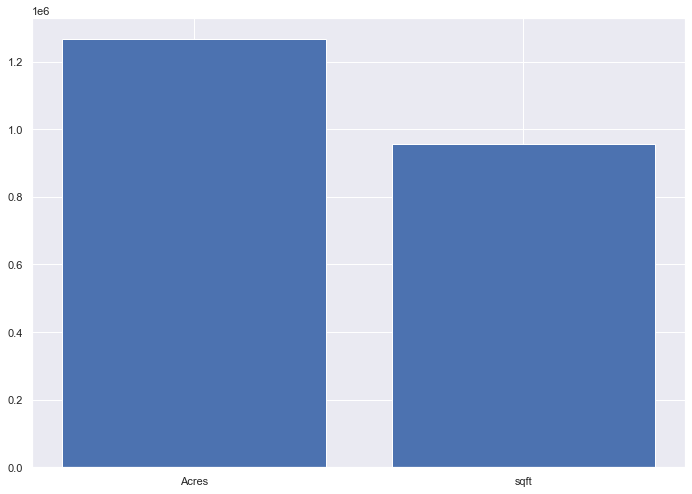

In [234]:
df_filtered = df.groupby('lotAreaUnits', as_index = False).price.mean()
plt.bar(df_filtered.lotAreaUnits, df_filtered.price)

In [235]:
df[(df.livingArea - df.livingAreaValue) == 0]

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled,streetFreqEnc,homeTypeFreqEnc,cityFreqEnc,countyFreqEnc
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,other,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,other,13.0,1.0,2,1.0,0.975200,0.972023,0.866025,6.123234e-17,2021,-0.628621,0.614634,0.182045,0.028507,1.0
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,1671.0,sqft,2.0,3.0,1671.0,2.0,One Story,0,0,0,SINGLE_FAMILY,other,other,193.0,7.0,28,3.0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,-0.272505,0.614634,0.625928,0.000512,1.0
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,1414.0,Acres,2.0,3.0,1414.0,2.0,One Story,0,0,0,SINGLE_FAMILY,other,other,189.0,7.0,27,3.0,-0.994700,-0.998244,-0.866025,-1.836970e-16,2021,-0.289975,0.614634,0.625928,0.000512,1.0
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,1336.0,sqft,2.0,3.0,1336.0,1.0,Two Story,0,1,0,SINGLE_FAMILY,other,other,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.323571,0.614634,0.625928,0.000512,1.0
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Appian Way,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.525146,0.000096,0.182045,0.000512,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35382,90036-20786205,12447,2021-06-22,0,0,Listed for sale,1.602634e+12,2249000.0,0.0,Los Angeles,1925,429 N Spaulding Ave,90036.0,-118.357658,34.079071,0,"""Gorgeous and charming 4-unit complex in highl...",0.0,0.0,sqft,0.0,0.0,3781.0,0.0,0,0,0,0,MULTI_FAMILY,other,other,173.0,6.0,25,2.0,-0.985301,-0.984231,-1.000000,-1.000000e+00,2021,0.785092,0.614634,0.068787,0.046871,1.0
35383,90036-20785299,12447,2021-06-22,0,0,Listed for sale,1.624320e+12,2295000.0,0.0,Los Angeles,1924,622 N Gardner St,90036.0,-118.352928,34.082546,0,Just completed side by side duplex in trendy M...,0.0,0.0,sqft,0.0,0.0,2247.0,0.0,0,0,0,0,MULTI_FAMILY,other,N Gardner St,173.0,6.0,25,2.0,-0.985301,-0.984231,-1.000000,-1.000000e+00,2021,0.816000,0.000064,0.068787,0.046871,1.0
35384,90036-20610069,12447,2021-06-19,0,0,Listing removed,1.620259e+12,3360000.0,0.0,Los Angeles,1927,736 S Cloverdale Ave,90036.0,-118.346329,34.061150,0,Offering absolute privacy on a large flat lot ...,0.0,0.0,sqft,4.0,4.0,0.0,0.0,0,0,0,0,SINGLE_FAMILY,other,S Cloverdale Ave,170.0,6.0,24,2.0,-0.975200,-0.956401,-1.000000,-1.000000e+00,2021,1.531591,0.000128,0.625928,0.046871,1.0
35385,90036-20610391,12447,2021-06-17,0,0,Listing removed,1.624320e+12,1699000.0,958.0,Los Angeles,1924,937 Masselin Ave,90036.0,-118.354790,34.058182,0,"""Beautiful Mediterranean stunner centrally loc...",1774.0,1774.0,sqft,2.0,3.0,0.0,2.0,0,0,0,0,SINGLE_FAMILY,other,Masselin Ave,168.0,6.0,24,2.0,-0.967028,-0.956401,-1.000000,-1.000000e+00,2021,0.415538,0.000064,0.625928,0.046871,1.0


In [236]:
df[(df.livingArea - df.livingAreaValue) != 0]

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,livingAreaValue,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled,streetFreqEnc,homeTypeFreqEnc,cityFreqEnc,countyFreqEnc
34975,92127-120289174,54296,2021-07-08,0,0,Sold,1.603930e+12,1153000.0,44.0,San Diego,2014,15870 Potomac Ridge Rd,92127.0,-117.12973,33.016441,0,"""This rarely available corner lot with a priva...",0.0,26210.0965,sqft,3.0,4.0,0.0,2.0,Two,0,1,0,SINGLE_FAMILY,other,other,189.0,7.0,27,3.0,-0.9947,-0.998244,-0.866025,-1.836970e-16,2021,0.048671,0.614634,0.625928,0.024667,1.0


In [238]:
df = df[(df.livingArea - df.livingAreaValue) == 0]

In [239]:
df = df.drop('livingAreaValue', axis = 1)

In [240]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled,streetFreqEnc,homeTypeFreqEnc,cityFreqEnc,countyFreqEnc
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,other,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,other,13.0,1.0,2,1.0,0.975200,0.972023,0.866025,6.123234e-17,2021,-0.628621,0.614634,0.182045,0.028507,1.0
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,sqft,2.0,3.0,1671.0,2.0,One Story,0,0,0,SINGLE_FAMILY,other,other,193.0,7.0,28,3.0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,-0.272505,0.614634,0.625928,0.000512,1.0
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,Acres,2.0,3.0,1414.0,2.0,One Story,0,0,0,SINGLE_FAMILY,other,other,189.0,7.0,27,3.0,-0.994700,-0.998244,-0.866025,-1.836970e-16,2021,-0.289975,0.614634,0.625928,0.000512,1.0
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,sqft,2.0,3.0,1336.0,1.0,Two Story,0,1,0,SINGLE_FAMILY,other,other,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.323571,0.614634,0.625928,0.000512,1.0
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Appian Way,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.525146,0.000096,0.182045,0.000512,1.0


In [242]:
df[df.livingArea == df.buildingArea]

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled,streetFreqEnc,homeTypeFreqEnc,cityFreqEnc,countyFreqEnc
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,other,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,other,13.0,1.0,2,1.0,0.975200,0.972023,0.866025,6.123234e-17,2021,-0.628621,0.614634,0.182045,0.028507,1.0
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,sqft,2.0,3.0,1671.0,2.0,One Story,0,0,0,SINGLE_FAMILY,other,other,193.0,7.0,28,3.0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,-0.272505,0.614634,0.625928,0.000512,1.0
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,Acres,2.0,3.0,1414.0,2.0,One Story,0,0,0,SINGLE_FAMILY,other,other,189.0,7.0,27,3.0,-0.994700,-0.998244,-0.866025,-1.836970e-16,2021,-0.289975,0.614634,0.625928,0.000512,1.0
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,sqft,2.0,3.0,1336.0,1.0,Two Story,0,1,0,SINGLE_FAMILY,other,other,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.323571,0.614634,0.625928,0.000512,1.0
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Appian Way,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.525146,0.000096,0.182045,0.000512,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35360,92391-137693022,38070,2021-05-25,0,0,Listing removed,1.624320e+12,29900.0,0.0,Twin Peaks,0,900 Lo Ln,92391.0,-117.248383,34.237309,0,"""Own part of your own cul-de-sac. Level paved...",0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Lo Ln,145.0,5.0,21,2.0,-0.794658,-0.794854,-0.866025,-1.000000e+00,2021,-0.705958,0.000064,0.182045,0.000800,1.0
35361,92391-2098743320,5482,2021-05-25,0,0,Listing removed,1.624320e+12,12500.0,0.0,Twin Peaks,0,0 Jacqueline Rd,92391.0,-117.228172,34.244083,0,Nice lot- ready to build all utilities are a...,0.0,sqft,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Jacqueline Rd,145.0,5.0,21,2.0,-0.794658,-0.794854,-0.866025,-1.000000e+00,2021,-0.717650,0.000064,0.182045,0.000800,1.0
35375,90036-2070211770,12447,2021-07-02,0,0,Listing removed,1.625184e+12,2395000.0,481.0,Los Angeles,1927,165-165 S Mansfield Ave #167,90036.0,-118.340759,34.063942,0,Spectacular Duplex in Historic Hancock Park! T...,4978.0,sqft,0.0,0.0,4978.0,4.0,Two,0,0,0,MULTI_FAMILY,other,other,183.0,7.0,26,3.0,-1.000000,-0.998244,-0.866025,-1.836970e-16,2021,0.883192,0.614634,0.068787,0.046871,1.0
35379,90036-20778142,12447,2021-06-25,0,0,Listed for sale,1.624579e+12,2499999.0,0.0,Los Angeles,1925,110 N Citrus Ave,90036.0,-118.339378,34.074032,0,"""We are Accepting All offers now!!! Flexible f...",0.0,sqft,3.0,3.0,0.0,0.0,0,1,1,0,SINGLE_FAMILY,other,N Citrus Ave,176.0,6.0,25,2.0,-0.992788,-0.984231,-1.000000,-1.000000e+00,2021,0.953742,0.000064,0.625928,0.046871,1.0


In [243]:
df[df.livingArea != df.buildingArea]

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled,streetFreqEnc,homeTypeFreqEnc,cityFreqEnc,countyFreqEnc
17,91605-2069586184,12447,2021-07-13,0,0,Listed for sale,1.626134e+12,274950.0,367.0,North Hollywood,1962,7137 Coldwater Canyon Ave #6,91605.0,-118.413963,34.200287,0,Updated 2Bd+1Ba unit located on a Lower Level ...,750.0,sqft,1.0,2.0,0.0,1.0,One,0,0,0,CONDO,other,other,194.0,7.0,28,3.0,-0.982223,-0.984231,-0.866025,-1.836970e-16,2021,-0.541305,0.614634,0.092014,0.003519,1.0
18,91605-20000583,12447,2021-07-13,0,0,Listed for sale,1.626134e+12,645000.0,548.0,North Hollywood,1976,7823 Lemp Ave,91605.0,-118.384827,34.212803,0,Updated kitchen with self closing cabinets and...,1177.0,sqft,1.0,3.0,0.0,2.0,One,0,0,0,SINGLE_FAMILY,other,other,194.0,7.0,28,3.0,-0.982223,-0.984231,-0.866025,-1.836970e-16,2021,-0.292662,0.614634,0.625928,0.003519,1.0
19,91605-19998959,12447,2021-07-13,0,0,Listed for sale,1.626048e+12,1200000.0,516.0,North Hollywood,1952,12421 Stagg St,91605.0,-118.403717,34.212372,0,"""Amazing location curb appeal and so much char...",2325.0,sqft,4.0,5.0,0.0,2.0,One,0,0,0,SINGLE_FAMILY,other,Stagg St,194.0,7.0,28,3.0,-0.982223,-0.984231,-0.866025,-1.836970e-16,2021,0.080251,0.000096,0.625928,0.003519,1.0
20,91605-20000255,12447,2021-07-12,0,0,None,NaN,0.0,0.0,North Hollywood,1949,7815 Simpson Ave,91605.0,-118.389191,34.212513,0,"""First time on the market for sale in over 40 ...",1520.0,sqft,3.0,3.0,0.0,2.0,One,0,0,0,SINGLE_FAMILY,other,other,193.0,7.0,28,3.0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,-0.726049,0.614634,0.625928,0.003519,1.0
21,91605-19997810,12447,2021-07-09,0,0,Listed for sale,1.625789e+12,650000.0,453.0,North Hollywood,1951,7706 Wilkinson Ave,91605.0,-118.403976,34.210537,0,The house is larger than the picture depicts. ...,1435.0,sqft,2.0,3.0,0.0,1.0,0,0,0,0,SINGLE_FAMILY,other,Wilkinson Ave,190.0,7.0,27,3.0,-0.992788,-0.998244,-0.866025,-1.836970e-16,2021,-0.289303,0.000160,0.625928,0.003519,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35381,90036-20608738,12447,2021-06-24,0,0,Listed for sale,1.624493e+12,2195000.0,863.0,Los Angeles,1926,915 S Ogden Dr,90036.0,-118.361488,34.059158,0,"""What you need to know about this property: Or...",2544.0,sqft,4.0,4.0,0.0,0.0,One,0,0,0,SINGLE_FAMILY,other,other,175.0,6.0,25,2.0,-0.990584,-0.984231,-1.000000,-1.000000e+00,2021,0.748808,0.614634,0.625928,0.046871,1.0
35382,90036-20786205,12447,2021-06-22,0,0,Listed for sale,1.602634e+12,2249000.0,0.0,Los Angeles,1925,429 N Spaulding Ave,90036.0,-118.357658,34.079071,0,"""Gorgeous and charming 4-unit complex in highl...",0.0,sqft,0.0,0.0,3781.0,0.0,0,0,0,0,MULTI_FAMILY,other,other,173.0,6.0,25,2.0,-0.985301,-0.984231,-1.000000,-1.000000e+00,2021,0.785092,0.614634,0.068787,0.046871,1.0
35383,90036-20785299,12447,2021-06-22,0,0,Listed for sale,1.624320e+12,2295000.0,0.0,Los Angeles,1924,622 N Gardner St,90036.0,-118.352928,34.082546,0,Just completed side by side duplex in trendy M...,0.0,sqft,0.0,0.0,2247.0,0.0,0,0,0,0,MULTI_FAMILY,other,N Gardner St,173.0,6.0,25,2.0,-0.985301,-0.984231,-1.000000,-1.000000e+00,2021,0.816000,0.000064,0.068787,0.046871,1.0
35385,90036-20610391,12447,2021-06-17,0,0,Listing removed,1.624320e+12,1699000.0,958.0,Los Angeles,1924,937 Masselin Ave,90036.0,-118.354790,34.058182,0,"""Beautiful Mediterranean stunner centrally loc...",1774.0,sqft,2.0,3.0,0.0,2.0,0,0,0,0,SINGLE_FAMILY,other,Masselin Ave,168.0,6.0,24,2.0,-0.967028,-0.956401,-1.000000,-1.000000e+00,2021,0.415538,0.000064,0.625928,0.046871,1.0


In [251]:
df['area'] = 0

In [255]:
df.loc[df.livingArea == df.buildingArea, 'area'] = df[df.livingArea == df.buildingArea].livingArea

In [256]:
df[df.livingArea == df.buildingArea]

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled,streetFreqEnc,homeTypeFreqEnc,cityFreqEnc,countyFreqEnc,area
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,other,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,other,13.0,1.0,2,1.0,0.975200,0.972023,0.866025,6.123234e-17,2021,-0.628621,0.614634,0.182045,0.028507,1.0,0.0
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,sqft,2.0,3.0,1671.0,2.0,One Story,0,0,0,SINGLE_FAMILY,other,other,193.0,7.0,28,3.0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,-0.272505,0.614634,0.625928,0.000512,1.0,1671.0
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,Acres,2.0,3.0,1414.0,2.0,One Story,0,0,0,SINGLE_FAMILY,other,other,189.0,7.0,27,3.0,-0.994700,-0.998244,-0.866025,-1.836970e-16,2021,-0.289975,0.614634,0.625928,0.000512,1.0,1414.0
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,sqft,2.0,3.0,1336.0,1.0,Two Story,0,1,0,SINGLE_FAMILY,other,other,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.323571,0.614634,0.625928,0.000512,1.0,1336.0
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Appian Way,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.525146,0.000096,0.182045,0.000512,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35360,92391-137693022,38070,2021-05-25,0,0,Listing removed,1.624320e+12,29900.0,0.0,Twin Peaks,0,900 Lo Ln,92391.0,-117.248383,34.237309,0,"""Own part of your own cul-de-sac. Level paved...",0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Lo Ln,145.0,5.0,21,2.0,-0.794658,-0.794854,-0.866025,-1.000000e+00,2021,-0.705958,0.000064,0.182045,0.000800,1.0,0.0
35361,92391-2098743320,5482,2021-05-25,0,0,Listing removed,1.624320e+12,12500.0,0.0,Twin Peaks,0,0 Jacqueline Rd,92391.0,-117.228172,34.244083,0,Nice lot- ready to build all utilities are a...,0.0,sqft,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Jacqueline Rd,145.0,5.0,21,2.0,-0.794658,-0.794854,-0.866025,-1.000000e+00,2021,-0.717650,0.000064,0.182045,0.000800,1.0,0.0
35375,90036-2070211770,12447,2021-07-02,0,0,Listing removed,1.625184e+12,2395000.0,481.0,Los Angeles,1927,165-165 S Mansfield Ave #167,90036.0,-118.340759,34.063942,0,Spectacular Duplex in Historic Hancock Park! T...,4978.0,sqft,0.0,0.0,4978.0,4.0,Two,0,0,0,MULTI_FAMILY,other,other,183.0,7.0,26,3.0,-1.000000,-0.998244,-0.866025,-1.836970e-16,2021,0.883192,0.614634,0.068787,0.046871,1.0,4978.0
35379,90036-20778142,12447,2021-06-25,0,0,Listed for sale,1.624579e+12,2499999.0,0.0,Los Angeles,1925,110 N Citrus Ave,90036.0,-118.339378,34.074032,0,"""We are Accepting All offers now!!! Flexible f...",0.0,sqft,3.0,3.0,0.0,0.0,0,1,1,0,SINGLE_FAMILY,other,N Citrus Ave,176.0,6.0,25,2.0,-0.992788,-0.984231,-1.000000,-1.000000e+00,2021,0.953742,0.000064,0.625928,0.046871,1.0,0.0


In [257]:
df.loc[((df.livingArea != df.buildingArea) & (df.livingArea > 0)), 'area'] = df[((df.livingArea != df.buildingArea) & (df.livingArea > 0))].livingArea

In [258]:
df.loc[((df.livingArea != df.buildingArea) & (df.buildingArea > 0)), 'area'] = df[((df.livingArea != df.buildingArea) & (df.buildingArea > 0))].buildingArea

In [261]:
df[['livingArea', 'buildingArea', 'area']].head(30)

,livingArea,buildingArea,area
0,0.0,0.0,0.0
1,1671.0,1671.0,1671.0
2,1414.0,1414.0,1414.0
3,1336.0,1336.0,1336.0
4,0.0,0.0,0.0
5,1413.0,1413.0,1413.0
6,2278.0,2278.0,2278.0
7,826.0,826.0,826.0
8,996.0,996.0,996.0
9,2535.0,2535.0,2535.0


In [262]:
df[df.area == 0]

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled,streetFreqEnc,homeTypeFreqEnc,cityFreqEnc,countyFreqEnc,area
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,other,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,other,13.0,1.0,2,1.0,0.975200,0.972023,0.866025,6.123234e-17,2021,-0.628621,0.614634,0.182045,0.028507,1.0,0.0
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Appian Way,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.525146,0.000096,0.182045,0.000512,1.0,0.0
13,94564-82799933,36958,2021-05-13,0,0,Listed for sale,1.620864e+12,695000.0,0.0,Pinole,0,2500 Galbreth Rd,94564.0,-122.280006,37.983269,0,"""Build your dream house or two dream houses. G...",0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Galbreth Rd,133.0,5.0,19,2.0,-0.653680,-0.630088,-0.866025,-1.000000e+00,2021,-0.259067,0.000064,0.182045,0.000512,1.0,0.0
14,94564-2082711365,36958,2021-04-21,0,0,Listed for sale,1.618963e+12,2260000.0,0.0,Pinole,0,0 Pinon Ave,94564.0,-122.299049,38.004803,0,Rare and wonderful opportunity for a creative ...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,other,111.0,4.0,16,2.0,-0.328542,-0.320270,-0.500000,-1.000000e+00,2021,0.792483,0.614634,0.182045,0.000512,1.0,0.0
15,94564-2071919419,36958,2021-04-09,0,0,Listed for sale,1.617926e+12,740000.0,0.0,Pinole,0,0 Hazel St,94564.0,-122.301407,38.009293,0,Seller willing to carry portion of price for b...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Hazel St,99.0,4.0,14,2.0,-0.128398,-0.088796,-0.500000,-1.000000e+00,2021,-0.228830,0.000128,0.182045,0.000512,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35359,92391-2093794997,5482,2021-05-25,0,0,Listing removed,1.624320e+12,9999.0,0.0,Twin Peaks,0,0 Boulder Ln,92391.0,-117.232773,34.243385,0,This lot is owned by the listing agent.,0.0,sqft,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,other,145.0,5.0,21,2.0,-0.794658,-0.794854,-0.866025,-1.000000e+00,2021,-0.719330,0.614634,0.182045,0.000800,1.0,0.0
35360,92391-137693022,38070,2021-05-25,0,0,Listing removed,1.624320e+12,29900.0,0.0,Twin Peaks,0,900 Lo Ln,92391.0,-117.248383,34.237309,0,"""Own part of your own cul-de-sac. Level paved...",0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Lo Ln,145.0,5.0,21,2.0,-0.794658,-0.794854,-0.866025,-1.000000e+00,2021,-0.705958,0.000064,0.182045,0.000800,1.0,0.0
35361,92391-2098743320,5482,2021-05-25,0,0,Listing removed,1.624320e+12,12500.0,0.0,Twin Peaks,0,0 Jacqueline Rd,92391.0,-117.228172,34.244083,0,Nice lot- ready to build all utilities are a...,0.0,sqft,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Jacqueline Rd,145.0,5.0,21,2.0,-0.794658,-0.794854,-0.866025,-1.000000e+00,2021,-0.717650,0.000064,0.182045,0.000800,1.0,0.0
35379,90036-20778142,12447,2021-06-25,0,0,Listed for sale,1.624579e+12,2499999.0,0.0,Los Angeles,1925,110 N Citrus Ave,90036.0,-118.339378,34.074032,0,"""We are Accepting All offers now!!! Flexible f...",0.0,sqft,3.0,3.0,0.0,0.0,0,1,1,0,SINGLE_FAMILY,other,N Citrus Ave,176.0,6.0,25,2.0,-0.992788,-0.984231,-1.000000,-1.000000e+00,2021,0.953742,0.000064,0.625928,0.046871,1.0,0.0


Too much samples. For good, it's better to regen this values, but i havn't enought time for this. It could be the same task of regression.

In [263]:
df.homeType.unique()

array(['LOT', 'SINGLE_FAMILY', 'CONDO', 'MULTI_FAMILY', 'TOWNHOUSE',
       'APARTMENT'], dtype=object)

In [266]:
pd.get_dummies(df.homeType)

,APARTMENT,CONDO,LOT,MULTI_FAMILY,SINGLE_FAMILY,TOWNHOUSE
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
35382,0,0,0,1,0,0
35383,0,0,0,1,0,0
35384,0,0,0,0,1,0
35385,0,0,0,0,1,0


In [268]:
df = df.join(pd.get_dummies(df.homeType))

In [269]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled,streetFreqEnc,homeTypeFreqEnc,cityFreqEnc,countyFreqEnc,area,APARTMENT,CONDO,LOT,MULTI_FAMILY,SINGLE_FAMILY,TOWNHOUSE
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,other,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,other,13.0,1.0,2,1.0,0.975200,0.972023,0.866025,6.123234e-17,2021,-0.628621,0.614634,0.182045,0.028507,1.0,0.0,0,0,1,0,0,0
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,sqft,2.0,3.0,1671.0,2.0,One Story,0,0,0,SINGLE_FAMILY,other,other,193.0,7.0,28,3.0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,-0.272505,0.614634,0.625928,0.000512,1.0,1671.0,0,0,0,0,1,0
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,Acres,2.0,3.0,1414.0,2.0,One Story,0,0,0,SINGLE_FAMILY,other,other,189.0,7.0,27,3.0,-0.994700,-0.998244,-0.866025,-1.836970e-16,2021,-0.289975,0.614634,0.625928,0.000512,1.0,1414.0,0,0,0,0,1,0
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,sqft,2.0,3.0,1336.0,1.0,Two Story,0,1,0,SINGLE_FAMILY,other,other,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.323571,0.614634,0.625928,0.000512,1.0,1336.0,0,0,0,0,1,0
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Appian Way,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.525146,0.000096,0.182045,0.000512,1.0,0.0,0,0,1,0,0,0


In [270]:
df.pricePerSquareFoot.describe()

count    3.125500e+04
mean     8.442644e+02
std      2.315548e+04
min      0.000000e+00
25%      1.580000e+02
50%      3.550000e+02
75%      5.750000e+02
max      2.100000e+06
Name: pricePerSquareFoot, dtype: float64

In [271]:
df[df.pricePerSquareFoot == 0]

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled,streetFreqEnc,homeTypeFreqEnc,cityFreqEnc,countyFreqEnc,area,APARTMENT,CONDO,LOT,MULTI_FAMILY,SINGLE_FAMILY,TOWNHOUSE
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,other,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,other,13.0,1.0,2,1.0,0.975200,0.972023,0.866025,6.123234e-17,2021,-0.628621,0.614634,0.182045,0.028507,1.0,0.0,0,0,1,0,0,0
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Appian Way,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.525146,0.000096,0.182045,0.000512,1.0,0.0,0,0,1,0,0,0
13,94564-82799933,36958,2021-05-13,0,0,Listed for sale,1.620864e+12,695000.0,0.0,Pinole,0,2500 Galbreth Rd,94564.0,-122.280006,37.983269,0,"""Build your dream house or two dream houses. G...",0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Galbreth Rd,133.0,5.0,19,2.0,-0.653680,-0.630088,-0.866025,-1.000000e+00,2021,-0.259067,0.000064,0.182045,0.000512,1.0,0.0,0,0,1,0,0,0
14,94564-2082711365,36958,2021-04-21,0,0,Listed for sale,1.618963e+12,2260000.0,0.0,Pinole,0,0 Pinon Ave,94564.0,-122.299049,38.004803,0,Rare and wonderful opportunity for a creative ...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,other,111.0,4.0,16,2.0,-0.328542,-0.320270,-0.500000,-1.000000e+00,2021,0.792483,0.614634,0.182045,0.000512,1.0,0.0,0,0,1,0,0,0
15,94564-2071919419,36958,2021-04-09,0,0,Listed for sale,1.617926e+12,740000.0,0.0,Pinole,0,0 Hazel St,94564.0,-122.301407,38.009293,0,Seller willing to carry portion of price for b...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Hazel St,99.0,4.0,14,2.0,-0.128398,-0.088796,-0.500000,-1.000000e+00,2021,-0.228830,0.000128,0.182045,0.000512,1.0,0.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35379,90036-20778142,12447,2021-06-25,0,0,Listed for sale,1.624579e+12,2499999.0,0.0,Los Angeles,1925,110 N Citrus Ave,90036.0,-118.339378,34.074032,0,"""We are Accepting All offers now!!! Flexible f...",0.0,sqft,3.0,3.0,0.0,0.0,0,1,1,0,SINGLE_FAMILY,other,N Citrus Ave,176.0,6.0,25,2.0,-0.992788,-0.984231,-1.000000,-1.000000e+00,2021,0.953742,0.000064,0.625928,0.046871,1.0,0.0,0,0,0,0,1,0
35380,90036-20786230,12447,2021-06-25,0,0,Listed for sale,1.620605e+12,2399000.0,0.0,Los Angeles,1929,434 N Ogden Dr,90036.0,-118.359108,34.079205,0,"""Charming Spanish 4-unit complex* Located in v...",0.0,sqft,0.0,0.0,5222.0,0.0,0,0,0,0,MULTI_FAMILY,other,N Ogden Dr,176.0,6.0,25,2.0,-0.992788,-0.984231,-1.000000,-1.000000e+00,2021,0.885879,0.000096,0.068787,0.046871,1.0,5222.0,0,0,0,1,0,0
35382,90036-20786205,12447,2021-06-22,0,0,Listed for sale,1.602634e+12,2249000.0,0.0,Los Angeles,1925,429 N Spaulding Ave,90036.0,-118.357658,34.079071,0,"""Gorgeous and charming 4-unit complex in highl...",0.0,sqft,0.0,0.0,3781.0,0.0,0,0,0,0,MULTI_FAMILY,other,other,173.0,6.0,25,2.0,-0.985301,-0.984231,-1.000000,-1.000000e+00,2021,0.785092,0.614634,0.068787,0.046871,1.0,3781.0,0,0,0,1,0,0
35383,90036-20785299,12447,2021-06-22,0,0,Listed for sale,1.624320e+12,2295000.0,0.0,Los Angeles,1924,622 N Gardner St,90036.0,-118.352928,34.082546,0,Just completed side by side duplex in trendy M...,0.0,sqft,0.0,0.0,2247.0,0.0,0,0,0,0,MULTI_FAMILY,other,N Gardner St,173.0,6.0,25,2.0,-0.985301,-0.984231,-1.

There are also a lot of samples with zero value

In [275]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [295]:
vectorizer = TfidfVectorizer(max_df = 0.9, min_df = 0.1, max_features = 10000)

In [296]:
df_filtered = df[~df.description.isna()]

In [297]:
X = vectorizer.fit_transform(df_filtered.description)

In [304]:
Xtrain = pd.DataFrame(X.toarray(), columns = vectorizer.vocabulary_)
ytrain = df_filtered.priceScaled.reset_index().drop('index', axis = 1)
Xtrain = sm.add_constant(Xtrain)
lin_reg = sm.OLS(ytrain, Xtrain).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            priceScaled   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     57.90
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:09:29   Log-Likelihood:                -39896.
No. Observations:               31002   AIC:                         8.012e+04
Df Residuals:                   30839   BIC:                         8.148e+04
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3245      0.031    -10.593   

In [305]:
df.description.isna().any()

True

In [307]:
df.loc[df.description.isna(), 'description'] = ''

In [308]:
df.description.isna().any()

False

In [309]:
vectorizer = TfidfVectorizer(max_df = 0.85, min_df = 0.15, max_features = 10000)

In [310]:
X = vectorizer.fit_transform(df_filtered.description)

In [311]:
df.head()

,id,cityId,datePostedString,is_bankOwned,is_forAuction,event,time,price,pricePerSquareFoot,city,yearBuilt,streetAddress,zipcode,longitude,latitude,hasBadGeocode,description,livingArea,lotAreaUnits,bathrooms,bedrooms,buildingArea,garageSpaces,levels,pool,spa,isNewConstruction,homeType,county,Street,day,month,week,quarter,dayCos,weekCos,monthCos,quarterCos,year,priceScaled,streetFreqEnc,homeTypeFreqEnc,cityFreqEnc,countyFreqEnc,area,APARTMENT,CONDO,LOT,MULTI_FAMILY,SINGLE_FAMILY,TOWNHOUSE
0,95717-2087851113,24895,2021-01-13,0,0,Listed for sale,1.610496e+12,145000.0,0.0,other,0,0 Moody Ridge Rd,95717.0,-120.834473,39.167866,0,Amazing opportunity to build your dream home O...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,other,13.0,1.0,2,1.0,0.975200,0.972023,0.866025,6.123234e-17,2021,-0.628621,0.614634,0.182045,0.028507,1.0,0.0,0,0,1,0,0,0
1,94564-18496265,36958,2021-07-12,0,0,Listed for sale,1.626048e+12,675000.0,404.0,Pinole,1958,1476 Belden Ct,94564.0,-122.300613,38.001213,0,"""Great house in a wonderful neighborhood! Wal...",1671.0,sqft,2.0,3.0,1671.0,2.0,One Story,0,0,0,SINGLE_FAMILY,other,other,193.0,7.0,28,3.0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,-0.272505,0.614634,0.625928,0.000512,1.0,1671.0,0,0,0,0,1,0
2,94564-18484475,36958,2021-07-08,0,0,Listed for sale,1.625702e+12,649000.0,459.0,Pinole,1959,3540 Savage Ave,94564.0,-122.271362,37.982040,0,"""Light-filled mid-century 3 BR 2 BA home in th...",1414.0,Acres,2.0,3.0,1414.0,2.0,One Story,0,0,0,SINGLE_FAMILY,other,other,189.0,7.0,27,3.0,-0.994700,-0.998244,-0.866025,-1.836970e-16,2021,-0.289975,0.614634,0.625928,0.000512,1.0,1414.0,0,0,0,0,1,0
3,94564-18494835,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,599000.0,448.0,Pinole,1908,2391 Plum St,94564.0,-122.289230,38.004395,0,The cutest house in the historic district of P...,1336.0,sqft,2.0,3.0,1336.0,1.0,Two Story,0,1,0,SINGLE_FAMILY,other,other,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.323571,0.614634,0.625928,0.000512,1.0,1336.0,0,0,0,0,1,0
4,94564-2069722747,36958,2021-07-07,0,0,Listed for sale,1.625616e+12,299000.0,0.0,Pinole,0,2693 Appian Way,94564.0,-122.298439,37.986309,0,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,Acres,0.0,0.0,0.0,0.0,0,0,0,0,LOT,other,Appian Way,188.0,7.0,27,3.0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,-0.525146,0.000096,0.182045,0.000512,1.0,0.0,0,0,1,0,0,0


In [354]:
df.to_csv('CaliforniaBackUp.csv')

In [397]:
df = df.reset_index().drop('index', axis = 1)

In [398]:
Xtrain = df[['description', 'pricePerSquareFoot', 'yearBuilt', 'longitude', 'latitude', 'livingArea', 'bathrooms', 'bedrooms',\
             'garageSpaces', 'pool', 'spa', 'isNewConstruction', 'dayCos', 'weekCos', 'monthCos', 'quarterCos',\
             'year', 'streetFreqEnc', 'homeTypeFreqEnc', 'cityFreqEnc', 'countyFreqEnc','area', 'APARTMENT', 'CONDO',\
             'LOT', 'MULTI_FAMILY', 'SINGLE_FAMILY', 'TOWNHOUSE']]

In [399]:
vectorizer = TfidfVectorizer(max_df = 0.85, min_df = 0.15, max_features = 10000)

In [400]:
X = vectorizer.fit_transform(Xtrain.description)

In [401]:
pd.DataFrame(X.toarray(), columns = vectorizer.vocabulary_).add_prefix('tfidf_')

,tfidf_opportunity,tfidf_to,tfidf_your,tfidf_home,tfidf_on,tfidf_has,tfidf_for,tfidf_is,tfidf_in,tfidf_private,tfidf_access,tfidf_enjoy,tfidf_the,tfidf_views,tfidf_great,tfidf_house,tfidf_this,tfidf_you,tfidf_will,tfidf_open,tfidf_that,tfidf_it,tfidf_as,tfidf_well,tfidf_family,tfidf_own,tfidf_with,tfidf_an,tfidf_patio,tfidf_beautiful,tfidf_room,tfidf_or,tfidf_bedrooms,tfidf_located,tfidf_at,tfidf_back,tfidf_of,tfidf_backyard,tfidf_just,tfidf_have,tfidf_from,tfidf_all,tfidf_shopping,tfidf_light,tfidf_floors,tfidf_kitchen,tfidf_new,tfidf_features,tfidf_by,tfidf_master,tfidf_wood,tfidf_fireplace,tfidf_living,tfidf_yard,tfidf_large,tfidf_car,tfidf_garage,tfidf_built,tfidf_water,tfidf_location,tfidf_close,tfidf_dining,tfidf_ceilings,tfidf_spacious,tfidf_two,tfidf_be,tfidf_unit,tfidf_space,tfidf_perfect,tfidf_area,tfidf_one,tfidf_front,tfidf_bathrooms,tfidf_lot,tfidf_bedroom,tfidf_bath,tfidf_laundry,tfidf_throughout,tfidf_bathroom,tfidf_flooring,tfidf_community,tfidf_parking,tfidf_walk,tfidf_more,tfidf_property,tfidf_offers,tfidf_suite,tfidf_windows,tfidf_out,tfidf_pool,tfidf_floor,tfidf_granite,tfidf_appliances,tfidf_closet,tfidf_custom,tfidf_park,tfidf_storage,tfidf_there,tfidf_are,tfidf_full
0,0.286291,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.322788,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.170668,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.211571,0.000000,0.163617,0.000000,0.143888,0.164996,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.0,0.203376,0.000000,0.000000,0.330224,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281593,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.138699,0.0,0.000000,0.000000,0.281700,0.000000,0.000000,0.292134,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.501616
1,0.000000,0.072409,0.064836,0.000000,0.0,0.000000,0.241766,0.085084,0.092064,0.169814,0.0,0.000000,0.000000,0.000000,0.147654,0.000000,0.066500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.271677,0.074940,0.000000,0.000000,0.000000,0.00000,0.000000,0.047881,0.142725,0.000000,0.0,0.000000,0.0,0.148608,0.000000,0.096071,0.137709,0.264327,0.121105,0.185160,0.2585,0.271928,0.000000,0.000000,0.0,0.000000,0.000000,0.068544,0.000000,0.00000,0.0000,0.0,0.000000,0.215871,0.0,0.000000,0.000000,0.075365,0.000000,0.143149,0.0,0.094037,0.000000,0.000000,0.084406,0.000000,0.000000,0.000000,0.000000,0.056322,0.087324,0.000000,0.000000,0.0,0.000000,0.078163,0.350210,0.0,0.089123,0.000000,0.158063,0.000000,0.000000,0.000000,0.0,0.000000,0.088965,0.091827,0.0000,0.041006,0.000000,0.000000,0.293614,0.281459
2,0.092209,0.083127,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.317074,0.000000,0.0,0.000000,0.000000,0.000000,0.084755,0.000000,0.000000,0.102245,0.198337,0.089761,0.000000,0.095155,0.0,0.0,0.00000,0.086322,0.000000,0.344132,0.088163,0.093937,0.000000,0.00000,0.216989,0.109938,0.081926,0.000000,0.0,0.078450,0.0,0.000000,0.068143,0.000000,0.052698,0.000000,0.370748,0.053142,0.0000,0.000000,0.127892,0.074713,0.0,0.108579,0.071019,0.000000,0.103398,0.00000,0.0903,0.0,0.260479,0.396519,0.0,0.065503,0.000000,0.000000,0.000000,0.082169,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064659,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.268032,0.0,0.000000,0.000000,0.090730,0.000000,0.000000,0.000000,0.0,0.104874,0.000000,0.000000,0.0000,0.000000,0.218331,0.105348,0.000000,0.000000
3,0.000000,0.000000,0.368168,0.000000,0.0,0.096853,0.114404,0.000000,0.000000,0.120534,0.0,0.000000,0.000000,0.119577,0.104805,0.000000,0.094404,0.000000,0.000000,0.000000,0.134971,0.000000,0.0,0.0,0.00000,0.106743,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.134161,0.339864,0.101307,0.000000,0.0,

In [402]:
Xtrain

,description,pricePerSquareFoot,yearBuilt,longitude,latitude,livingArea,bathrooms,bedrooms,garageSpaces,pool,spa,isNewConstruction,dayCos,weekCos,monthCos,quarterCos,year,streetFreqEnc,homeTypeFreqEnc,cityFreqEnc,countyFreqEnc,area,APARTMENT,CONDO,LOT,MULTI_FAMILY,SINGLE_FAMILY,TOWNHOUSE
0,Amazing opportunity to build your dream home O...,0.0,0,-120.834473,39.167866,0.0,0.0,0.0,0.0,0,0,0,0.975200,0.972023,0.866025,6.123234e-17,2021,0.614634,0.182045,0.028507,1.0,0.0,0,0,1,0,0,0
1,"""Great house in a wonderful neighborhood! Wal...",404.0,1958,-122.300613,38.001213,1671.0,2.0,3.0,2.0,0,0,0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,0.614634,0.625928,0.000512,1.0,1671.0,0,0,0,0,1,0
2,"""Light-filled mid-century 3 BR 2 BA home in th...",459.0,1959,-122.271362,37.982040,1414.0,2.0,3.0,2.0,0,0,0,-0.994700,-0.998244,-0.866025,-1.836970e-16,2021,0.614634,0.625928,0.000512,1.0,1414.0,0,0,0,0,1,0
3,The cutest house in the historic district of P...,448.0,1908,-122.289230,38.004395,1336.0,2.0,3.0,1.0,0,1,0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,0.614634,0.625928,0.000512,1.0,1336.0,0,0,0,0,1,0
4,MIXED USE ZOING BUYER TO VERIFY WITH CITY OF P...,0.0,0,-122.298439,37.986309,0.0,0.0,0.0,0.0,0,0,0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,0.000096,0.182045,0.000512,1.0,0.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31250,"""Gorgeous and charming 4-unit complex in highl...",0.0,1925,-118.357658,34.079071,0.0,0.0,0.0,0.0,0,0,0,-0.985301,-0.984231,-1.000000,-1.000000e+00,2021,0.614634,0.068787,0.046871,1.0,3781.0,0,0,0,1,0,0
31251,Just completed side by side duplex in trendy M...,0.0,1924,-118.352928,34.082546,0.0,0.0,0.0,0.0,0,0,0,-0.985301,-0.984231,-1.000000,-1.000000e+00,2021,0.000064,0.068787,0.046871,1.0,2247.0,0,0,0,1,0,0
31252,Offering absolute privacy on a large flat lot ...,0.0,1927,-118.346329,34.061150,0.0,4.0,4.0,0.0,0,0,0,-0.975200,-0.956401,-1.000000,-1.000000e+00,2021,0.000128,0.625928,0.046871,1.0,0.0,0,0,0,0,1,0
31253,"""Beautiful Mediterranean stunner centrally loc...",958.0,1924,-118.354790,34.058182,1774.0,2.0,3.0,2.0,0,0,0,-0.967028,-0.956401,-1.000000,-1.000000e+00,2021,0.000064,0.625928,0.046871,1.0,1774.0,0,0,0,0,1,0


In [403]:
Xtrain = Xtrain.merge(pd.DataFrame(X.toarray(), columns = vectorizer.vocabulary_).add_prefix('tfidf_'), left_index = True, right_index = True)

In [404]:
ytrain = df.priceScaled

In [405]:
Xtrain = Xtrain.drop('description', axis = 1)

In [408]:
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 10000, random_state = 42)

In [409]:
ridge = Ridge(random_state = 42)
ridge.fit(X_train, y_train)

Ridge(random_state=42)

In [410]:
ridge.score(X_train, y_train)

0.38833224798914023

In [411]:
ridge.score(X_test, y_test)

0.3664392707260198

In [412]:
mean_absolute_error(y_train, ridge.predict(X_train))

0.42663909883894896

In [413]:
mean_absolute_error(y_test, ridge.predict(X_test))

0.4311355584593486

Last result

In [414]:
'''
0.25342822654528596
0.2449521580725459
696928.3927178852
694823.352673645
'''

'\n0.25342822654528596\n0.2449521580725459\n696928.3927178852\n694823.352673645\n'

In [415]:
0.3664392707260198/0.2449521580725459

1.4959626141260363

R2 now in 1.5 times better

In [416]:
ytrain = df.price

In [417]:
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 10000, random_state = 42)

In [418]:
ridge = Ridge(random_state = 42)
ridge.fit(X_train, y_train)

Ridge(random_state=42)

In [419]:
ridge.score(X_train, y_train)

0.3883322479891408

In [420]:
ridge.score(X_test, y_test)

0.3664392707260208

In [421]:
mean_absolute_error(y_train, ridge.predict(X_train))

634958.3751705581

In [422]:
mean_absolute_error(y_test, ridge.predict(X_test))

641650.3654320197

In [423]:
694823.352673645-641650.3654320197

53172.98724162532

And MAE is better near 53 000

In [424]:
Xtrain

,pricePerSquareFoot,yearBuilt,longitude,latitude,livingArea,bathrooms,bedrooms,garageSpaces,pool,spa,isNewConstruction,dayCos,weekCos,monthCos,quarterCos,year,streetFreqEnc,homeTypeFreqEnc,cityFreqEnc,countyFreqEnc,area,APARTMENT,CONDO,LOT,MULTI_FAMILY,SINGLE_FAMILY,TOWNHOUSE,tfidf_opportunity,tfidf_to,tfidf_your,tfidf_home,tfidf_on,tfidf_has,tfidf_for,tfidf_is,tfidf_in,tfidf_private,tfidf_access,tfidf_enjoy,tfidf_the,tfidf_views,tfidf_great,tfidf_house,tfidf_this,tfidf_you,tfidf_will,tfidf_open,tfidf_that,tfidf_it,tfidf_as,tfidf_well,tfidf_family,tfidf_own,tfidf_with,tfidf_an,tfidf_patio,tfidf_beautiful,tfidf_room,tfidf_or,tfidf_bedrooms,tfidf_located,tfidf_at,tfidf_back,tfidf_of,tfidf_backyard,tfidf_just,tfidf_have,tfidf_from,tfidf_all,tfidf_shopping,tfidf_light,tfidf_floors,tfidf_kitchen,tfidf_new,tfidf_features,tfidf_by,tfidf_master,tfidf_wood,tfidf_fireplace,tfidf_living,tfidf_yard,tfidf_large,tfidf_car,tfidf_garage,tfidf_built,tfidf_water,tfidf_location,tfidf_close,tfidf_dining,tfidf_ceilings,tfidf_spacious,tfidf_two,tfidf_be,tfidf_unit,tfidf_space,tfidf_perfect,tfidf_area,tfidf_one,tfidf_front,tfidf_bathrooms,tfidf_lot,tfidf_bedroom,tfidf_bath,tfidf_laundry,tfidf_throughout,tfidf_bathroom,tfidf_flooring,tfidf_community,tfidf_parking,tfidf_walk,tfidf_more,tfidf_property,tfidf_offers,tfidf_suite,tfidf_windows,tfidf_out,tfidf_pool,tfidf_floor,tfidf_granite,tfidf_appliances,tfidf_closet,tfidf_custom,tfidf_park,tfidf_storage,tfidf_there,tfidf_are,tfidf_full
0,0.0,0,-120.834473,39.167866,0.0,0.0,0.0,0.0,0,0,0,0.975200,0.972023,0.866025,6.123234e-17,2021,0.614634,0.182045,0.028507,1.0,0.0,0,0,1,0,0,0,0.286291,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.322788,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.170668,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.211571,0.000000,0.163617,0.000000,0.143888,0.164996,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.0,0.203376,0.000000,0.000000,0.330224,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281593,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.138699,0.0,0.000000,0.000000,0.281700,0.000000,0.000000,0.292134,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.501616
1,404.0,1958,-122.300613,38.001213,1671.0,2.0,3.0,2.0,0,0,0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,0.614634,0.625928,0.000512,1.0,1671.0,0,0,0,0,1,0,0.000000,0.072409,0.064836,0.000000,0.0,0.000000,0.241766,0.085084,0.092064,0.169814,0.0,0.000000,0.000000,0.000000,0.147654,0.000000,0.066500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.271677,0.074940,0.000000,0.000000,0.000000,0.00000,0.000000,0.047881,0.142725,0.000000,0.0,0.000000,0.0,0.148608,0.000000,0.096071,0.137709,0.264327,0.121105,0.185160,0.2585,0.271928,0.000000,0.000000,0.0,0.000000,0.000000,0.068544,0.000000,0.00000,0.0000,0.0,0.000000,0.215871,0.0,0.000000,0.000000,0.075365,0.000000,0.143149,0.0,0.094037,0.000000,0.000000,0.084406,0.000000,0.000000,0.000000,0.000000,0.056322,0.087324,0.000000,0.000000,0.0,0.000000,0.078163,0.350210,0.0,0.089123,0.000000,0.158063,0.000000,0.000000,0.000000,0.0,0.000000,0.088965,0.091827,0.0000,0.041006,0.000000,0.000000,0.293614,0.281459
2,459.0,1959,-122.271362,37.982040,1414.0,2.0,3.0,2.0,0,0,0,-0.994700,-0.998244,-0.866025,-1.836970e-16,2021,0.614634,0.625928,0.000512,1.0,1414.0,0,0,0,0,1,0,0.092209,0.083127,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.317074,0.000000,0.0,0.000000,0.000000,0.000000,0.084755,0.000000,0.000000,0.102245,0.198337,0.089761,0.000000,0.095155,0.0,0.0,0.00000,0.086322,0.000000,0.344132,0.088163,0.093937,0.000000,0.00000,0.216989,0.109938,0.081926,0.000000,0.0,0.078450,0.0,0.000000,0.068143,0.000000,0.052698,0.000000,0.370748,0.053142,0.0000,0.000000,0.12

In [425]:
Xtrain.yearBuilt.unique()

array([   0, 1958, 1959, 1908, 2000, 1988, 1991, 1972, 1966, 2021, 1954,
       1962, 1976, 1952, 1949, 1951, 1953, 1942, 1936, 2018, 1967, 1965,
       1970, 2006, 2005, 1955, 1948, 1926, 1924, 2010, 1917, 1920, 1916,
       1911, 1961, 1939, 1937, 1964, 2008, 1938, 1989, 1928, 1987, 1923,
       1973, 2019, 2004, 1956, 1935, 1950, 1947, 1984, 1963, 1941, 1945,
       1922, 1971, 1913, 1929, 1909, 2009, 1921, 1912, 1919, 1985, 1983,
       1927, 2003, 2020, 1980, 1975, 1979, 1990, 1968, 1998, 1992, 1981,
       2011, 2016, 2007, 1957, 1977, 1978, 1946, 1931, 1925, 1995, 1996,
       2014, 2015, 1969, 1993, 1999, 1997, 2013, 1930, 1960, 1940, 1974,
       2001, 2017, 2002, 1890, 1918, 1932, 1905, 1994, 2012, 1934, 1904,
       1907, 1900, 1886, 1906, 1914, 1880, 1910, 1982, 1944, 1943, 1986,
       1885, 1933, 1903, 1901, 1893, 1883, 1915, 1895, 2022, 1892, 1860,
       1875, 1902, 9999, 1899, 1894, 1897, 1877, 1896, 1889, 1887, 1888,
       1891, 1870, 1876, 1898, 1869, 1861, 1867, 18

In [426]:
Xtrain[Xtrain.yearBuilt == 0]

,pricePerSquareFoot,yearBuilt,longitude,latitude,livingArea,bathrooms,bedrooms,garageSpaces,pool,spa,isNewConstruction,dayCos,weekCos,monthCos,quarterCos,year,streetFreqEnc,homeTypeFreqEnc,cityFreqEnc,countyFreqEnc,area,APARTMENT,CONDO,LOT,MULTI_FAMILY,SINGLE_FAMILY,TOWNHOUSE,tfidf_opportunity,tfidf_to,tfidf_your,tfidf_home,tfidf_on,tfidf_has,tfidf_for,tfidf_is,tfidf_in,tfidf_private,tfidf_access,tfidf_enjoy,tfidf_the,tfidf_views,tfidf_great,tfidf_house,tfidf_this,tfidf_you,tfidf_will,tfidf_open,tfidf_that,tfidf_it,tfidf_as,tfidf_well,tfidf_family,tfidf_own,tfidf_with,tfidf_an,tfidf_patio,tfidf_beautiful,tfidf_room,tfidf_or,tfidf_bedrooms,tfidf_located,tfidf_at,tfidf_back,tfidf_of,tfidf_backyard,tfidf_just,tfidf_have,tfidf_from,tfidf_all,tfidf_shopping,tfidf_light,tfidf_floors,tfidf_kitchen,tfidf_new,tfidf_features,tfidf_by,tfidf_master,tfidf_wood,tfidf_fireplace,tfidf_living,tfidf_yard,tfidf_large,tfidf_car,tfidf_garage,tfidf_built,tfidf_water,tfidf_location,tfidf_close,tfidf_dining,tfidf_ceilings,tfidf_spacious,tfidf_two,tfidf_be,tfidf_unit,tfidf_space,tfidf_perfect,tfidf_area,tfidf_one,tfidf_front,tfidf_bathrooms,tfidf_lot,tfidf_bedroom,tfidf_bath,tfidf_laundry,tfidf_throughout,tfidf_bathroom,tfidf_flooring,tfidf_community,tfidf_parking,tfidf_walk,tfidf_more,tfidf_property,tfidf_offers,tfidf_suite,tfidf_windows,tfidf_out,tfidf_pool,tfidf_floor,tfidf_granite,tfidf_appliances,tfidf_closet,tfidf_custom,tfidf_park,tfidf_storage,tfidf_there,tfidf_are,tfidf_full
0,0.0,0,-120.834473,39.167866,0.0,0.0,0.0,0.0,0,0,0,0.975200,0.972023,0.866025,6.123234e-17,2021,0.614634,0.182045,0.028507,1.0,0.0,0,0,1,0,0,0,0.286291,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.322788,0.0,0.0,0.0,0.0,0.0,0.0,0.170668,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.211571,0.000000,0.163617,0.000000,0.143888,0.164996,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.203376,0.00000,0.0,0.330224,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.281593,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.138699,0.0,0.000000,0.0,0.281700,0.000000,0.0,0.292134,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.501616
4,0.0,0,-122.298439,37.986309,0.0,0.0,0.0,0.0,0,0,0,-0.996318,-0.998244,-0.866025,-1.836970e-16,2021,0.000096,0.182045,0.000512,1.0,0.0,0,0,1,0,0,0,0.329708,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.377919,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.376640,0.0,0.0,0.0,0.305013,0.000000,0.000000,0.000000,0.000000,0.331419,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.369716,0.000000,0.0,0.0,0.000000,0.177228,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.319466,0.0,0.000000,0.0,0.324420,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.168327,0.0,0.0,0.000000,0.000000
13,0.0,0,-122.280006,37.983269,0.0,0.0,0.0,0.0,0,0,0,-0.653680,-0.630088,-0.866025,-1.000000e+00,2021,0.000064,0.182045,0.000512,1.0,0.0,0,0,1,0,0,0,0.000000,0.190639,0.170701,0.0,0.000000,0.179623,0.0,0.448019,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.126062,0.000000,0.000000,0.0,0.0,0.0,0.195628,0.000000,0.000000,0.000000,0.231974,0.000000,0.121873,0.22686,0.238645,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.409595,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.188442,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.207929,0.0,0.0,0.205789,0.204897,0.0,0.117322,0.0,0.104037,0.207818,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.193257,0.185257
14,0.0,0,-122.299049,38.004803,0.0,0.0,0.0,0.0,0,0,0,-0.328542,-0.320270,-

In [429]:
squarePriceX = Xtrain[Xtrain.pricePerSquareFoot != 0].drop(['pricePerSquareFoot'], axis = 1)

In [430]:
squarePriceY = Xtrain[Xtrain.pricePerSquareFoot != 0].pricePerSquareFoot

In [431]:
squareRidge = Ridge(random_state = 42)
squareRidge.fit(squarePriceX, squarePriceY)

Ridge(random_state=42)

In [432]:
squareRidge.score(squarePriceX, squarePriceY)

0.013608803036726291

In [433]:
mean_absolute_error(squarePriceY, squareRidge.predict(squarePriceX))

2695.071651525403

In [434]:
squarePriceY.describe()

count    2.443800e+04
mean     1.079773e+03
std      2.618195e+04
min      1.000000e+00
25%      2.910000e+02
50%      4.410000e+02
75%      6.480000e+02
max      2.100000e+06
Name: pricePerSquareFoot, dtype: float64

In [442]:
Xtrain

,pricePerSquareFoot,yearBuilt,longitude,latitude,livingArea,bathrooms,bedrooms,garageSpaces,pool,spa,isNewConstruction,dayCos,weekCos,monthCos,quarterCos,year,streetFreqEnc,homeTypeFreqEnc,cityFreqEnc,countyFreqEnc,area,APARTMENT,CONDO,LOT,MULTI_FAMILY,SINGLE_FAMILY,TOWNHOUSE,tfidf_opportunity,tfidf_to,tfidf_your,tfidf_home,tfidf_on,tfidf_has,tfidf_for,tfidf_is,tfidf_in,tfidf_private,tfidf_access,tfidf_enjoy,tfidf_the,tfidf_views,tfidf_great,tfidf_house,tfidf_this,tfidf_you,tfidf_will,tfidf_open,tfidf_that,tfidf_it,tfidf_as,tfidf_well,tfidf_family,tfidf_own,tfidf_with,tfidf_an,tfidf_patio,tfidf_beautiful,tfidf_room,tfidf_or,tfidf_bedrooms,tfidf_located,tfidf_at,tfidf_back,tfidf_of,tfidf_backyard,tfidf_just,tfidf_have,tfidf_from,tfidf_all,tfidf_shopping,tfidf_light,tfidf_floors,tfidf_kitchen,tfidf_new,tfidf_features,tfidf_by,tfidf_master,tfidf_wood,tfidf_fireplace,tfidf_living,tfidf_yard,tfidf_large,tfidf_car,tfidf_garage,tfidf_built,tfidf_water,tfidf_location,tfidf_close,tfidf_dining,tfidf_ceilings,tfidf_spacious,tfidf_two,tfidf_be,tfidf_unit,tfidf_space,tfidf_perfect,tfidf_area,tfidf_one,tfidf_front,tfidf_bathrooms,tfidf_lot,tfidf_bedroom,tfidf_bath,tfidf_laundry,tfidf_throughout,tfidf_bathroom,tfidf_flooring,tfidf_community,tfidf_parking,tfidf_walk,tfidf_more,tfidf_property,tfidf_offers,tfidf_suite,tfidf_windows,tfidf_out,tfidf_pool,tfidf_floor,tfidf_granite,tfidf_appliances,tfidf_closet,tfidf_custom,tfidf_park,tfidf_storage,tfidf_there,tfidf_are,tfidf_full
0,0.0,0,-120.834473,39.167866,0.0,0.0,0.0,0.0,0,0,0,0.975200,0.972023,0.866025,6.123234e-17,2021,0.614634,0.182045,0.028507,1.0,0.0,0,0,1,0,0,0,0.286291,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.322788,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.170668,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.211571,0.000000,0.163617,0.000000,0.143888,0.164996,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.000000,0.000000,0.0,0.203376,0.000000,0.000000,0.330224,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281593,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.138699,0.0,0.000000,0.000000,0.281700,0.000000,0.000000,0.292134,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.501616
1,404.0,1958,-122.300613,38.001213,1671.0,2.0,3.0,2.0,0,0,0,-0.985301,-0.984231,-0.866025,-1.836970e-16,2021,0.614634,0.625928,0.000512,1.0,1671.0,0,0,0,0,1,0,0.000000,0.072409,0.064836,0.000000,0.0,0.000000,0.241766,0.085084,0.092064,0.169814,0.0,0.000000,0.000000,0.000000,0.147654,0.000000,0.066500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.271677,0.074940,0.000000,0.000000,0.000000,0.00000,0.000000,0.047881,0.142725,0.000000,0.0,0.000000,0.0,0.148608,0.000000,0.096071,0.137709,0.264327,0.121105,0.185160,0.2585,0.271928,0.000000,0.000000,0.0,0.000000,0.000000,0.068544,0.000000,0.00000,0.0000,0.0,0.000000,0.215871,0.0,0.000000,0.000000,0.075365,0.000000,0.143149,0.0,0.094037,0.000000,0.000000,0.084406,0.000000,0.000000,0.000000,0.000000,0.056322,0.087324,0.000000,0.000000,0.0,0.000000,0.078163,0.350210,0.0,0.089123,0.000000,0.158063,0.000000,0.000000,0.000000,0.0,0.000000,0.088965,0.091827,0.0000,0.041006,0.000000,0.000000,0.293614,0.281459
2,459.0,1959,-122.271362,37.982040,1414.0,2.0,3.0,2.0,0,0,0,-0.994700,-0.998244,-0.866025,-1.836970e-16,2021,0.614634,0.625928,0.000512,1.0,1414.0,0,0,0,0,1,0,0.092209,0.083127,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.317074,0.000000,0.0,0.000000,0.000000,0.000000,0.084755,0.000000,0.000000,0.102245,0.198337,0.089761,0.000000,0.095155,0.0,0.0,0.00000,0.086322,0.000000,0.344132,0.088163,0.093937,0.000000,0.00000,0.216989,0.109938,0.081926,0.000000,0.0,0.078450,0.0,0.000000,0.068143,0.000000,0.052698,0.000000,0.370748,0.053142,0.0000,0.000000,0.12

In [444]:
squareRidge.predict(Xtrain[Xtrain.pricePerSquareFoot == 0].drop('pricePerSquareFoot', axis = 1))

array([ 6853.93246494, -4038.75018391, -3567.41732604, ...,
       10959.1958666 ,  9050.02379402, -2812.98373841])

In [445]:
Xtrain.loc[Xtrain.pricePerSquareFoot == 0, 'pricePerSquareFoot'] = squareRidge.predict(Xtrain[Xtrain.pricePerSquareFoot == 0].drop('pricePerSquareFoot', axis = 1))

In [453]:
areaX = Xtrain[Xtrain.livingArea != 0].drop(['livingArea'], axis = 1)

In [454]:
areaY = Xtrain[Xtrain.livingArea != 0].livingArea

In [455]:
areaRidge = Ridge(random_state = 42)
areaRidge.fit(areaX, areaY)

Ridge(random_state=42)

In [456]:
areaRidge.score(areaX, areaY)

1.0

In [457]:
mean_absolute_error(areaY, areaRidge.predict(areaX))

4.0195906903252636e-11

In [458]:
areaRidge.predict(Xtrain[Xtrain.livingArea == 0].drop('livingArea', axis = 1))

array([ 7.40181631e-10,  7.24902866e-10,  7.16526454e-10, ...,
        3.78100000e+03,  2.24700000e+03, -7.77982005e-12])

In [459]:
Xtrain.loc[Xtrain.livingArea == 0, 'livingArea'] = areaRidge.predict(Xtrain[Xtrain.livingArea == 0].drop('livingArea', axis = 1))

In [460]:
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 10000, random_state = 42)

In [461]:
ridge = Ridge(random_state = 42)
ridge.fit(X_train, y_train)

Ridge(random_state=42)

In [462]:
ridge.score(X_train, y_train)

0.3781133165000363

In [463]:
ridge.score(X_test, y_test)

0.3607656360173598

In [464]:
mean_absolute_error(y_train, ridge.predict(X_train))

640945.1455888656

In [465]:
mean_absolute_error(y_test, ridge.predict(X_test))

645388.551006861

Result isn't much better

In [477]:
size = 30
mae_bootstrap = np.array([])
for i in range(10000):
    choices = list()
    for choice in range(size):
        choices.append(np.random.randint(low = 0, high = len(X_test)))
    mae_bootstrap = np.append(mae_bootstrap, mean_absolute_error(y_test.iloc[choices], ridge.predict(X_test.iloc[choices])))

In [478]:
from scipy.stats import normaltest
normaltest(mae_bootstrap)

NormaltestResult(statistic=2185.9874534636383, pvalue=0.0)

In [479]:
import scipy.stats as st

In [480]:
st.norm.interval(0.95, loc=mae_bootstrap.mean(), scale=mae_bootstrap.std())

(290665.7209071884, 995626.1348813467)

In [481]:
ytrain.describe()

count    3.125500e+04
mean     1.080561e+06
std      1.488327e+06
min      0.000000e+00
25%      3.900000e+05
50%      6.850000e+05
75%      1.199000e+06
max      1.800000e+07
Name: price, dtype: float64

MAE has big variance

In [483]:
low = st.norm.interval(0.95, loc=mae_bootstrap.mean(), scale=mae_bootstrap.std())[0]
high = st.norm.interval(0.95, loc=mae_bootstrap.mean(), scale=mae_bootstrap.std())[1]

In [484]:
mae_bootstrap = pd.DataFrame(mae_bootstrap)
mae_bootstrap = mae_bootstrap.rename({0:'mae'}, axis = 1)
mae_bootstrap['in_interval'] = mae_bootstrap['mae'].apply(lambda x : 1 if ((x > low) & (x < high)) else 0)

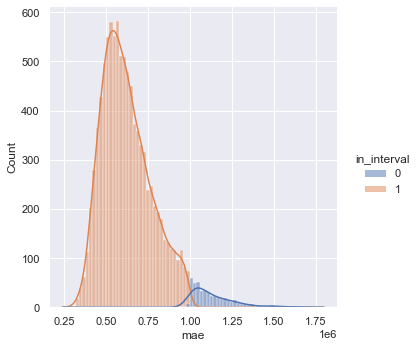

In [485]:
sns.displot(data = mae_bootstrap, x = 'mae', kde=True, hue = 'in_interval')

So with bigger alpha our high of interval surely will be much bigger

In [486]:
Xtrain.to_csv('CAX.csv')

In [487]:
ytrain.to_csv('CAY.csv')

In [491]:
params = {
    'alpha' : [1, 0.25, 0.5, 0.75, 1.25, 1.5, 1.75, 2]
}

In [492]:
from sklearn.model_selection import GridSearchCV

In [494]:
clf = GridSearchCV(Ridge(random_state = 42), params, verbose = 2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END .........................................alpha=0.25; total time=   0.0s
[CV] END .........................................alpha=0.25; total time=   0.0s
[CV] END .........................................alpha=0.25; total time=   0.0s
[CV] END .........................................alpha=0.25; total time=   0.0s
[CV] END .........................................alpha=0.25; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ........................................

GridSearchCV(estimator=Ridge(random_state=42),
             param_grid={'alpha': [1, 0.25, 0.5, 0.75, 1.25, 1.5, 1.75, 2]},
             verbose=2)

In [495]:
clf.best_params_

{'alpha': 0.25}

In [502]:
params = {
    'alpha' : [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.45]
}

In [503]:
clf = GridSearchCV(Ridge(random_state = 42), params, verbose = 2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END .........................................alpha=0.15; total time=   0.0s
[CV] END .........................................alpha=0.15; total time=   0.0s
[CV] END .........................................alpha=0.15; total time=   0.0s
[CV] END .........................................alpha=0.15; total time=   0.0s
[CV] END .........................................alpha=0.15; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END ........................................

GridSearchCV(estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.45]},
             verbose=2)

In [504]:
clf.best_params_

{'alpha': 0.1}

In [505]:
clf.best_estimator_.score(X_train, y_train)

0.3782947362931255

In [506]:
clf.best_estimator_.score(X_test, y_test)

0.3606799362379659

In [508]:
mean_absolute_error(y_train, clf.best_estimator_.predict(X_train))

641543.272586193

In [507]:
mean_absolute_error(y_test, clf.best_estimator_.predict(X_test))

646323.0943458013

In [509]:
from sklearn.linear_model import ElasticNetCV

In [510]:
elasticNet = ElasticNetCV(random_state = 42)
elasticNet.fit(X_train, y_train)

ElasticNetCV(random_state=42)

In [511]:
elasticNet.score(X_train, y_train)

0.004263271816318803

In [512]:
elasticNet.score(X_test, y_test)

0.004570516997335905

In [513]:
mean_absolute_error(y_train, elasticNet.predict(X_train))

819320.8040120213

In [514]:
mean_absolute_error(y_test, elasticNet.predict(X_test))

812738.3912463279

In [515]:
from sklearn.linear_model import LassoCV

In [516]:
lasso = LassoCV(random_state = 42)
lasso.fit(X_train, y_train)

LassoCV(random_state=42)

In [517]:
lasso.score(X_train, y_train)

0.01383789788369627

In [518]:
lasso.score(X_test, y_test)

0.017401938666391503

In [519]:
mean_absolute_error(y_train, lasso.predict(X_train))

808733.8558081739

In [520]:
mean_absolute_error(y_test, lasso.predict(X_test))

799401.1774170732

In [521]:
from sklearn.linear_model import LinearRegression

In [522]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [523]:
linreg.score(X_train, y_train)

0.37836077703523163

In [524]:
linreg.score(X_test, y_test)

0.3606656147881503

In [525]:
mean_absolute_error(y_train, linreg.predict(X_train))

641607.2305785826

In [526]:
mean_absolute_error(y_test, linreg.predict(X_test))

646447.4998053976

So the best models are linear regression and ridge regression, but considering that alpha for ridgeRegression is small, so it isn't such a difference between them and we can use lin reg